# I. INTRODUCTION
*Quadratic Voting (QV) is a powerful method for making collective decisions. In QV, individuals or representatives allocate voting power to convey both the degree and direction of their preferences. A defining feature of QV is the quadratic relationship between the number of voting credits and actual voting power. The number of voting credits is converted to voting power by taking the square root of the credits spent on an item. Traditionally, the number of voting credits each voter receives has been arbitrarily assigned. Therefore, determining the optimal number of voting credits to issue to each voter is a problem of considerable importance.*

# I.1) Determining the Number of Quadratic Voting Credits
This notebook aims to introduce a method to calculate the optimal number of quadratic voting credits (C) to issue to voters in a quadratic vote, based on the number of distinct items (N) on which they are voting. 

#### Goal: Identify the most general form of $C_{N} = f(N)$; *or, given a quadratic ballot with N choices, how many voting credits should each voter receive?*

# I.2) Basic Premise of Quadratic Voting.
As detailed by [Weyl and Lalley](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=2003531), Quadratic Voting is a process that allows individuals or their agents to express both the degree and direction* of their preferences by allocating votes (or more generally, voting power). The term 'quadratic' refers to the vote being equal to the square root of the number of voting credits used. Hence:

$V_n = \sqrt{C_n}$ where $n = 1,2,\dots,N$

and total Voting Power, $\text{VP}$, is the sum of all $V_n$, i.e.,

$\text{VP} = \sum{V_n}$

The proof of QV is based on the quadratic utility function - quadratic functions have linear derivatives, which means a voter buys votes equating their marginal benefit and cost to the number of votes proportional to their value.

\* 'Direction' here refers to a choice among options, not 'for' or 'against', which is the polar form of QV discussed below.

# I.3) Forms of Quadratic Voting
While the original implementation described by Weyl and Lalley involved a binary choice where voters could buy extra voting power, there are many ways to apply the underlying mechanism. For this analysis, the following categories of QV are defined:
1. **Paid Votes vs Standard Issue (vs Mix)** - In paid votes, there is no upper limit to an individual voter's voting power, provided they are willing to pay quadratically for extra voting credits using some common resource. With standard issue, all voters receive the same number of credits to use as they wish. A mix combines issued votes with additional votes available for purchase.
2. **Discrete vs Continuous Votes** - Discrete Votes restrict vote outcomes to integers, meaning credits can only be spent when they are perfect squares (1,4,9,16...). Continuous votes mean the vote can be a non-integer. This will typically be an irrational number unless the credits spent is a perfect square (as all non-perfect squares are irrational). Thus, implementing a continuous vote QV requires some sort of error correction, rounding, or other method to compare irrational outcomes.
3. **Discrete vs Continuous Voting Credits** - Discrete voting credits require the credits to be spent in integer increments. Continuous voting credits are best suited for a voting process that assigns voting power based on relative interests between options.
4. **One-time vs Multiple Ballots** - In a one-time vote, voting credits can only be used on a single ballot of items. Multiple ballots allot credits that can be used on a current ballot or saved for future ballots.
5. **Priority ('Positive-Only') vs Polar Voting** - Priority voting lets a voter express their preference for something, along with the degree of that preference, using only positive integers. Polar voting allows the voter to express preference for or against something, along with the degree (i.e., it allows for negative votes).
6. **Individual vs Collective Agency** - Individual Agency restricts voters from voting on behalf of, or allocating voting power to, another voter. Collective Agency allows for collectives to spend allocated votes on behalf of individual agents and takes this into account.
*It's worth noting that we could distinguish between binary and multiple choice voting. However, for the purpose of this analysis, we seek to generalize an answer where a binary choice is considered a QV with N = 2. At first glance, it seems that unless there are paid votes, in this case C = 1. We will discuss this point further in the next section.*

-----

# II. METHODOLOGY

# II.1) Background
Initially, this study aimed to investigate wasted voting power in discrete-credit/discrete-vote QV systems, where voters are often left with unusable voting credits without modifying their preferred voting inclination. This circumstance is particularly prevalent in small N ballots. 

#### After preliminary research, it was observed that mandating discrete, integer voting is significantly challenging in QV, often resulting in voters deviating signifigantly from their preferred strategies or experiencing diminished voting power.

On the other hand, continuous-credit/continuous-vote QV could be perceived as the epitome of QV, where voters assign the overall importance/utility of each item proportionally. However, this model is computationally demanding and, while conducive to graphical voting, may confuse or discomfort voters in the near term due to the lack of a clear, numeric comparison of their votes.

This analysis primarily focuses on striking a balance between the two extremes, along with simplifying other QV type-characteristics. Consequently, the objective and scope of the analysis were refined:

> ## The objective of this analysis is to derive a universal solution for C in a Quadratic Vote involving N-items, where the vote uses *standard issue*, *discrete voting credits*, and *continuous votes*. Moreover, the QV analyzed is a *one-time*, *polar* ballot for *individual agents*.

This implementation proves to be practical and is optimal for most organizations and institutions to collectively prioritize issues. This applies to corporate boards, small flatly organized companies, cooperatives, and even informal groups like friends determining plans.

# II.2) Definitions of Key Terms Used

1. QUADRATIC VOTING (QV): Voting method in which voters receive voting credits to distribute across N-number of ballot items (N-sized decision space). The credits are translated to votes at the square root of the total voting credits assigned. For Polar voting, negative votes use the positive form of $C_{n}$ but negate the outcome, resulting in $V_{n} = -\sqrt{C_{n}}$.

2. DECISION SPACE: The compilation of $N$-items being voted on quadratically, where $N$ is a positive integer.

3. VOTER: An individual (agent) who allocates voting power across voting items within an N-sized decision space.

4. VOTING ITEM: One of the $N$-items in the Decision Space where a voter can utilize voting credits.

5. QUADRATIC VOTING CREDIT: $C$ units of voting power that convert into votes quadratically. *Note: C represents the magnitude of the credit, so $C_{n} = abs(C_{n})$* 

6. VOTE ($V_n$): In the context of this analysis, a vote indicates how much voting power is assigned to a Voting Item given the number of credits expended on it. $V_{n} = \sqrt{C_{n}}$.  Individual votes are not as important to this analysis as total Voting Power. 

7. VOTING POWER (VP): The total amount of voting power applied to the ballot, $\text{VP} = \sum{V_n}$. 

8. STRATEGY: A numeric series representing how a voter has utilized their voting credits. It is a Decision Space where each voting item is allocated an integer number of voting credits (or zero). For instance, for $N = 4$ & $C = 50$, a possible voting strategy could be: [-9,0,36,-5]. Two types of strategies receive special consideration - Base Strategies and Null Strategies:
    
    - BASE STRATEGY: A base strategy comprises a set of strategies where the total voting power remains constant. For example, [4,2,0] would be the base strategy for [0,-4,2]. Base strategies are expressed from highest vote count on the left to lowest on the right, and each strategy represents all equivalent voting strategies (i.e., [4,2,1,0,0] == [2,4,0,0,1].
    - NULL STRATEGY: A voting strategy where all votes are equivalent, i.e., [2,2,2], [4,4,4,4,4,4], etc. These are all identical to [0,..,0], or not voting at all, and must be disregarded in numerical approaches. Note that a Base Strategy can resemble a null strategy, as a base with all identical elements can represent polar permutations of the base strategy (see below).

9. POLAR PERMUTATIONS: All feasible permutations of a Base Strategy, including instances where each non-zero term is inverted in sign. Or, every unique strategy signified by a base strategy.  These are required for polar votes; for priority votes it is simply the number of regular permutations of the strategy elements.

10. MINIMUM DIFFERENCE: The minimal number of credits required for a voter to assign unique amounts of voting power to each voting element within an N-sized decision space, allowing for distinct ranking of their choices.


# II.3) Summary of Approach
Both analytical and numerical methods were employed and subsequently compared.
- While the analytical approach doesn't present comprehensive proofs, the reasoning behind each step is *hopefully* coherent and easily replicable.
- The computational method aims to detect any natural voting patterns by simulating votes across various C and N and examining the results. While the focus is primarily on pattern identification rather than optimization for any specific criteria, fairness of voting remains a key consideration.
- Finally, the two approaches are compared to identify any computational patterns that align with an analytical solution. 

**Analytical**: The analytical approach aimed to identify the number of credits that strike a balance between voters who prefer to concentrate their voting power on a single item (consequently minimizing their total voting power), and those who aim to spread their credits to maximize total voting power. Realistically, most voters will fall between these two extremes.
1. As our focus is on polar voting, all Voting Items can have equal magnitude without becoming a null strategy, if at least one of those items carries a different sign from the others. Therefore, voters seeking to maximize total voting power will desire a number of credits C that can be evenly distributed across N voting items. This also sets the ratio of maximum possible voting power (from max spreaders) to minimum possible voting power (from max concentrators) equal to the $\sqrt{N}$ for all possible C.  
2. As C increases, the absolute difference in voting power between concentrators and spreaders increases, so concentrators will prefer a minimized C.
3. Along with the two aforementioned driving forces, the minimum number of credits allocated should allow each vote to be distinct in voting power from all other votes. For polar, -n is distinct from n.

**Computational**:
To validate any analytical solutions identified, and potentially reveal patterns indicative of other solutions, computational methods were used to seek out patterns and simulate voting across a range of N and C. All potential voting strategies using C voting credits spent on an N-item ballot were identified (up to a limit of $C = N^2 + N$ which was assumed to be outside the optimal credit issue range). Various measures of voting power of all these possible strategies can then be compared for a given C. Each strategy set, based on C, can then be scored according to which minimizes or maximizes the difference between these these key measures of VP. Enumerated step by step:
1. Develop an algorithm that returns all possible permutations of an array of N-integers whose absolute value sums to C.
2. Calculate the total voting power of each permutation. Find the weighted mean of all these unique permutations of voting power; this effectively simulates a ballot where every possible strategy is voted on once.  
3. Compare the minimum, above mean, and maximum voting power for a range of N and C.  
4. Generate simulated ballots and compare minimum, maximum, weighted mean, and simulated means.

# II.4) Assumptions
1. All null strategies (strategies where both the sign and magnitude of all elements in a strategy are identical) are equivalent and can be excluded from voting consideration.
2. N = 1 decouples into a Positive-Only N = 2.
3. Generally, for a binary N = 2, there is only one rational strategy: [1,0]. However, if the two items are separate, vote designers can introduce a "spread factor" to a general solution to provide more granularity of preference.
4. Related to the above assumption, for the purpose of this analysis, we assume that voting designers prefer the most balanced approach, so spread factors are not discussed here.
5. Perfectly rational voters are assumed, and the best C should only be assessed based on rational voting strategies.
    - Voters care primarily about the fairness of their vote and their individual preferences. 
    - Secondarily, they are concerned about maximizing the absolute magnitude of their voting strategy. 
    - Together these imply that from an external perspective, there is no qualitative difference between any *rational* strategy (the Equal Importance Axiom).
    - In reality, voters have a full set of possibilities to choose from, including strategies that are sub-optimal compared to their actual vote (i.e., not spending all of their voting credits). 
    
6. A C that continually increases with N does not have negative practical or computational impacts. In other words, having 870 voting credits for a 30-item ballot does not cause a negative human impact (i.e., being overwhelmed with the number of credits to spend) or computational impacts (it's not substantially more difficult, even on an expensive compute system like a blockchain, to have an ever-increasing number of credits). The solution to the former is effective UI. *Note: This assumption was made to ensure a broad range of credits was explored. As stated in the approach discussion, the most likely solution will have a minimal number of credits.*

-----

# III.  ANALYSIS

# III.1) Import Libraries

In [1]:
import pandas as pd
import numpy as np
from numpy import linalg as LA
import math
from itertools import combinations_with_replacement, groupby
from scipy.special import comb
from math import floor
import re
import random

# Plotting Libraries
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# III.2) Analytical Approach

The analytical approach:
1. Compares strategy sets, given an N and C, to understand how those two variables impact possible outcomes.
2. Finds the minimum number of credits needed for complete differentiation amongst voting items.
3. Determines the best C based on 1 & 2 above.

## III.2.a. Comparing Strategy Sets
#### In QV, voting power is reduced as it is concentrated.  But how do the different strategy sets of length N compare to one another when using the same C?

As an example: Given an empty strategy of length N = 6 -> [ _ \, \_ \, \_ \, \_ \, \_ \, \_ ], and 36 voting credits (C = 36), find the overall voting power based on concentration of votes for a set of representative strategies:

In [2]:
# N = 6, C = 36
# Representative stategies are given in base strategy convention (high to low, all positive)
strategies = [[36,0,0,0,0,0], # Max concentrated
              [18,18,0,0,0,0],
              [12,12,12,0,0,0],
              [9,9,9,9,0,0],
              [7,7,7,7,7,1],
              [7,6,6,6,6,5],
              [6,6,6,6,6,6], # Max spread
              [14,10,3,3,3,3],
              [24,6,3,3,0,0],
              [35,1,0,0,0,0]]

Since we are looking at polar voting, all Voting Items can be identical in magnitude without the strategy being a null strategy (since one of the elements can be a different sign from the others).  

Strategy [36, 0, 0, 0, 0, 0] voting power = 6.0
Strategy [18, 18, 0, 0, 0, 0] voting power = 8.4853
Strategy [12, 12, 12, 0, 0, 0] voting power = 10.3923
Strategy [9, 9, 9, 9, 0, 0] voting power = 12.0
Strategy [7, 7, 7, 7, 7, 1] voting power = 14.2288
Strategy [7, 6, 6, 6, 6, 5] voting power = 14.6798
Strategy [6, 6, 6, 6, 6, 6] voting power = 14.6969
Strategy [14, 10, 3, 3, 3, 3] voting power = 13.8321
Strategy [24, 6, 3, 3, 0, 0] voting power = 10.8126
Strategy [35, 1, 0, 0, 0, 0] voting power = 6.9161


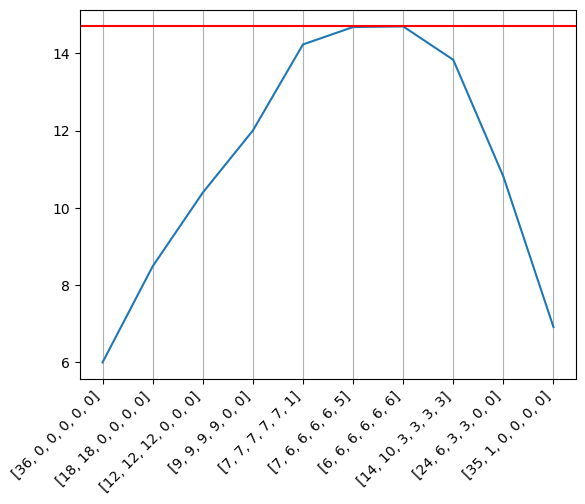

In [3]:
# Figure III.2.a(1): Calculating and graphing the voting power of each representative strategy.
voting_power_list = []
for strategy in strategies:
    vp = sum([x**.5 for x in strategy])
    voting_power_list.append(vp)
    print(f'Strategy {strategy} voting power = {round(vp,4)}')

default_x_ticks = range(len(strategies))
plt.plot(default_x_ticks, voting_power_list)
plt.xticks(default_x_ticks, strategies, rotation = 45, ha='right')
plt.grid(axis="x") 
plt.axhline(y=(6*6**.5),color='red')
plt.show()

The maximum voting power occurs when all elements are equal - the condition of maximum spread.  As the elements begin to differ from one another, voting power is reduced until the minimum is reached when all credits are spent on one item.

Examining when C does not evenly divide into N:

In [4]:
# N = 6, C = 35
# Some representative stategies to analyze to get the vp for a range of distributions.
strats_2 = [[35,0,0,0,0,0],
          [18,17,0,0,0,0],
          [12,12,11,0,0,0],
          [9,9,9,8,0,0],
          [7,7,7,7,7,0],
          [6,6,6,6,6,5],
          [7,6,6,6,5,5],
          [34,1,0,0,0,0]]

Strategy [35, 0, 0, 0, 0, 0] voting power = 5.9161
Strategy [18, 17, 0, 0, 0, 0] voting power = 8.3657
Strategy [12, 12, 11, 0, 0, 0] voting power = 10.2448
Strategy [9, 9, 9, 8, 0, 0] voting power = 11.8284
Strategy [7, 7, 7, 7, 7, 0] voting power = 13.2288
Strategy [6, 6, 6, 6, 6, 5] voting power = 14.4835
Strategy [7, 6, 6, 6, 5, 5] voting power = 14.4664
Strategy [34, 1, 0, 0, 0, 0] voting power = 6.831


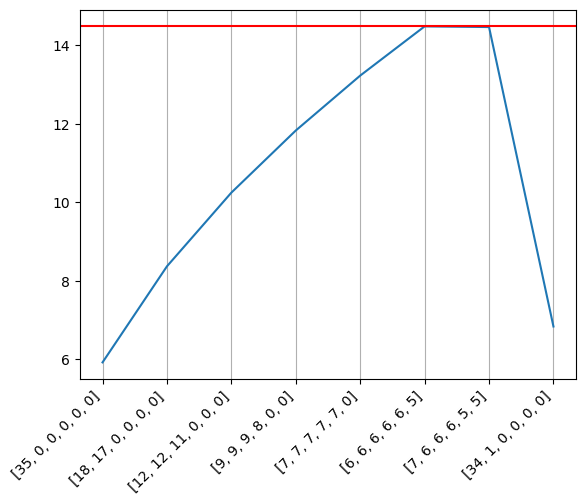

In [5]:
# Figure III.2.a(2): Calculating and graphing the voting power of each representative strategy.
voting_power_list_2 = []
for strategy in strats_2:
    vp = sum([x**.5 for x in strategy])
    voting_power_list_2.append(vp)
    print(f'Strategy {strategy} voting power = {round(vp,4)}')

default_x_ticks = range(len(strats_2))
plt.plot(default_x_ticks, voting_power_list_2)
plt.xticks(default_x_ticks, strats_2, rotation = 45, ha='right')
plt.grid(axis="x") 
plt.axhline(y=(5*6**.5+5**.5),color='red')
plt.show()

Maximum voting power occurs when the difference between the elements is minimized, in this case [6,6,6,6,6,5].  

##### In general - *maximum voting power occurs when the sum of differences between the elements is minimized, to include 0.*

Next, examining the ratio of max voting power to min voting power for a single N at different levels of C:

In [6]:
# Example III.2.a(3): Ratio of Max to Min Voting Power:
N = 6
for C in range(24,37):
    # Get minimum Vp
    min_VP = C**.5
    
    # Get maximum Vp
    a = C // N
    b = C % N
    max_VP = round(b*(a+1)**.5 + (N-b)*a**.5,5)
    
    ratio = max_VP/min_VP
    print(f'Ratio for N = {N} and C = {C} is {round(ratio,4)}')

Ratio for N = 6 and C = 24 is 2.4495
Ratio for N = 6 and C = 25 is 2.4472
Ratio for N = 6 and C = 26 is 2.446
Ratio for N = 6 and C = 27 is 2.4457
Ratio for N = 6 and C = 28 is 2.4462
Ratio for N = 6 and C = 29 is 2.4475
Ratio for N = 6 and C = 30 is 2.4495
Ratio for N = 6 and C = 31 is 2.448
Ratio for N = 6 and C = 32 is 2.4472
Ratio for N = 6 and C = 33 is 2.447
Ratio for N = 6 and C = 34 is 2.4473
Ratio for N = 6 and C = 35 is 2.4482
Ratio for N = 6 and C = 36 is 2.4495


The maximum ratio naturally ocurs when voting power is the largest for a given C - the case when N evenly divides into C.  This is also when the ratio is equal to $\sqrt{N}$.  Also, as C goes up, the ratio gets closer to $\sqrt{N}$ when N does not evenly divide into C.

##### Now examing a variety of N and C and how the ratio relates to C for each:

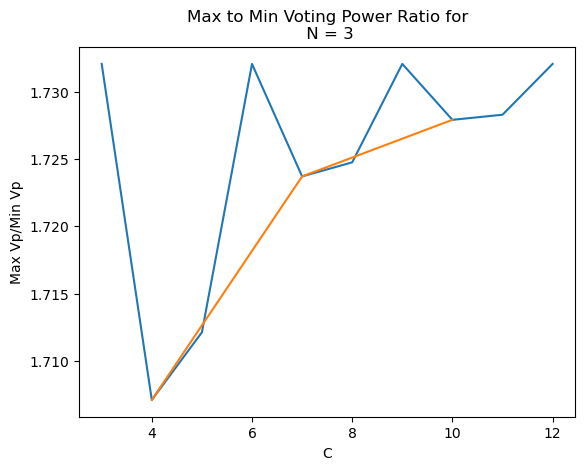

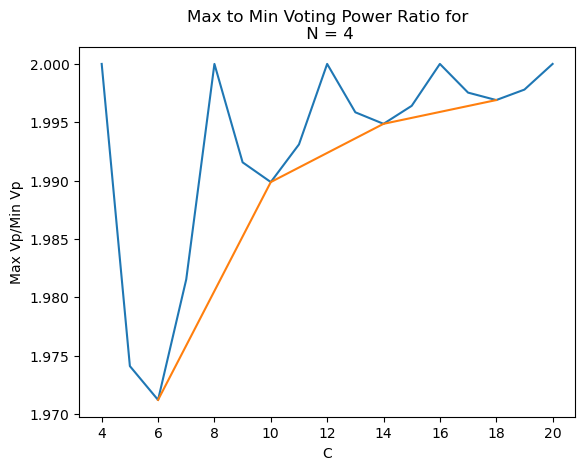

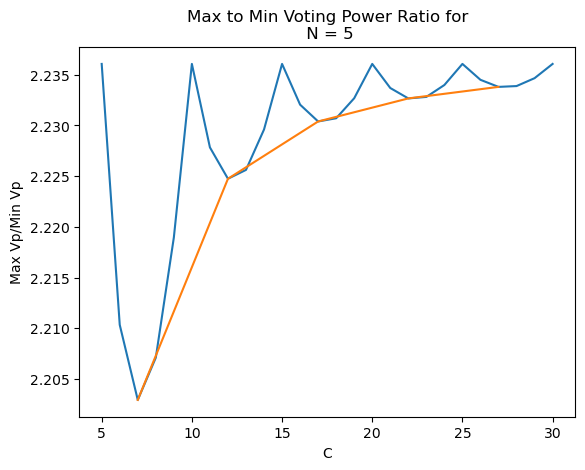

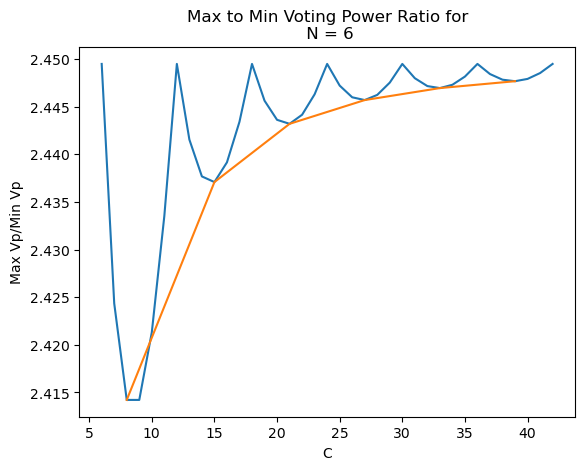

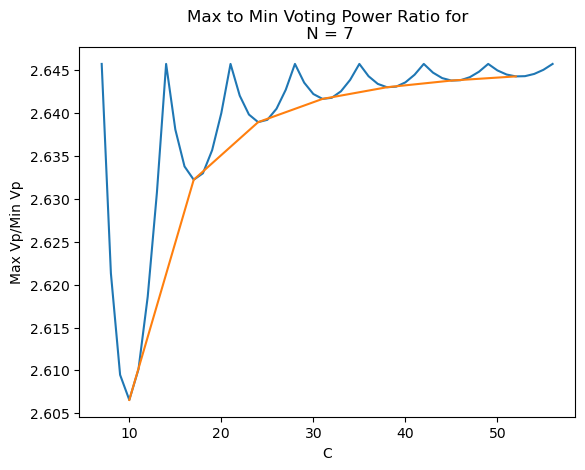

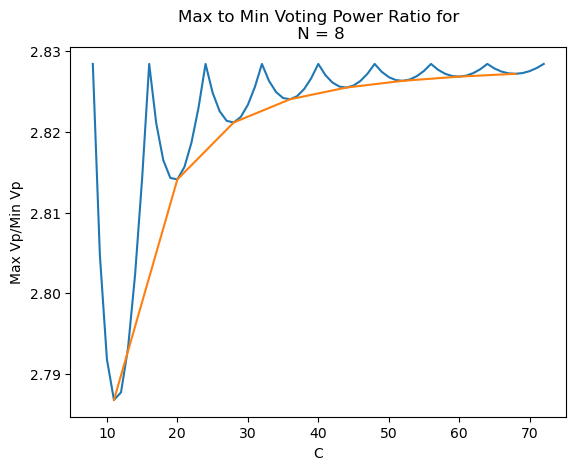

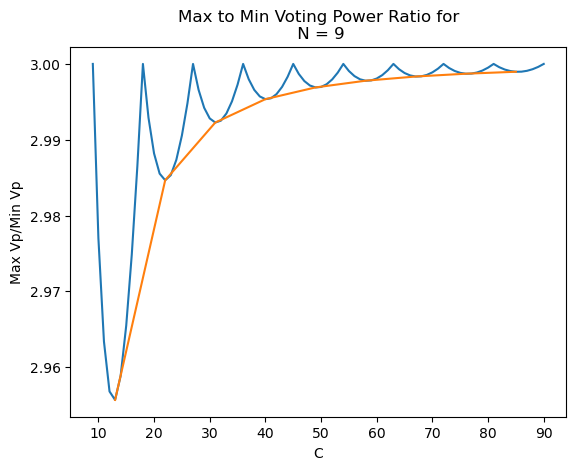

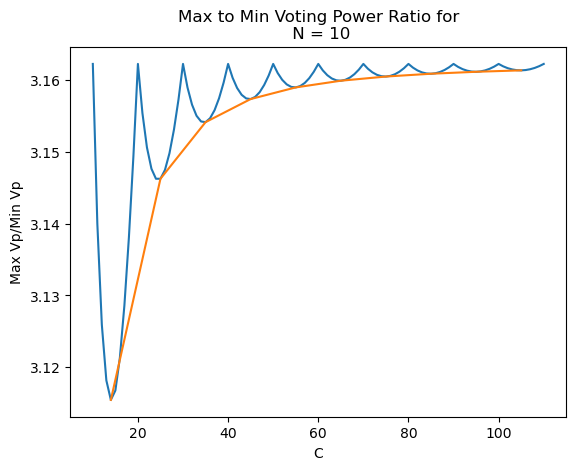

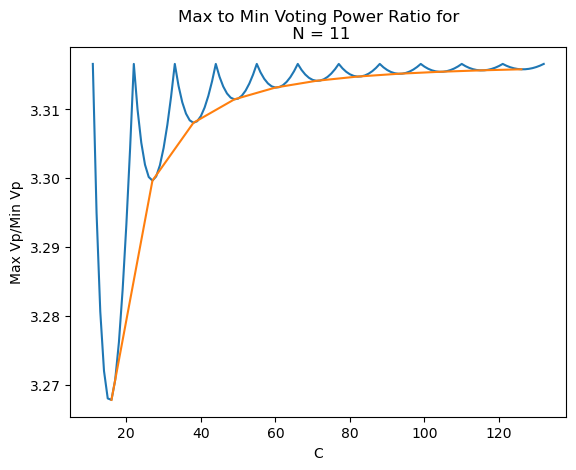

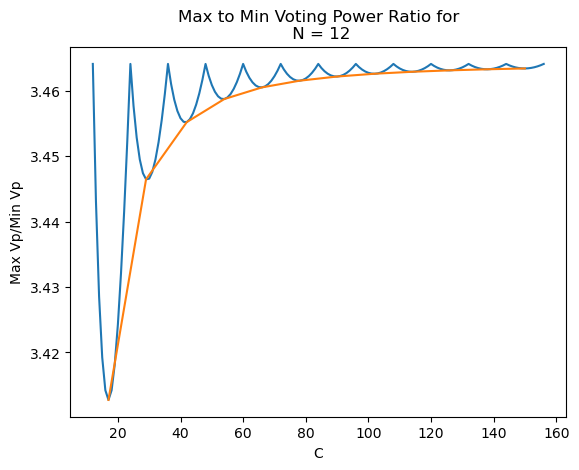

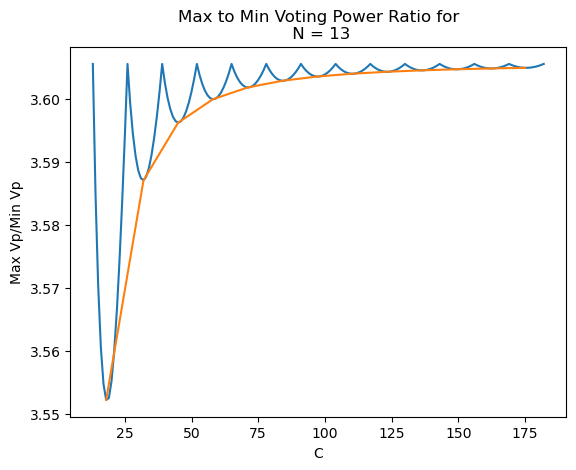

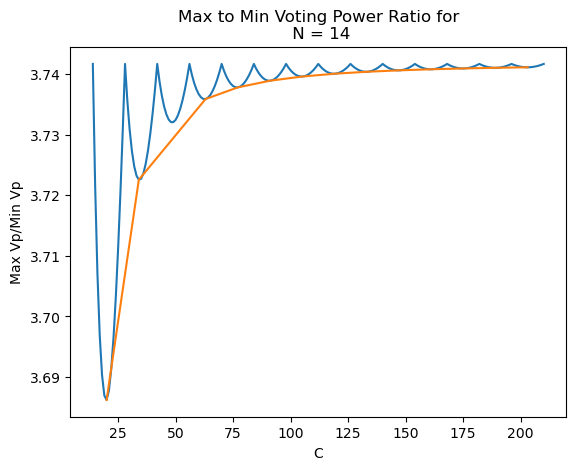

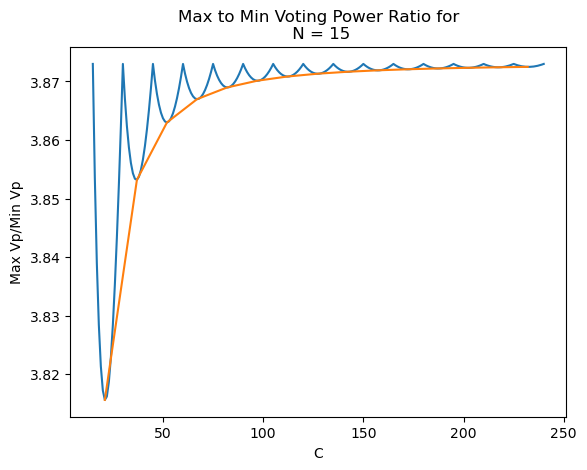

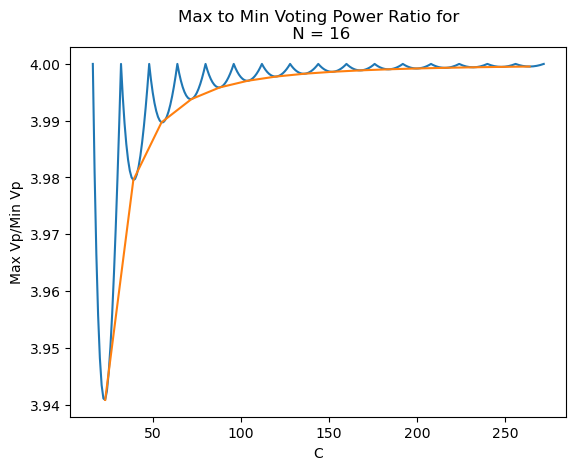

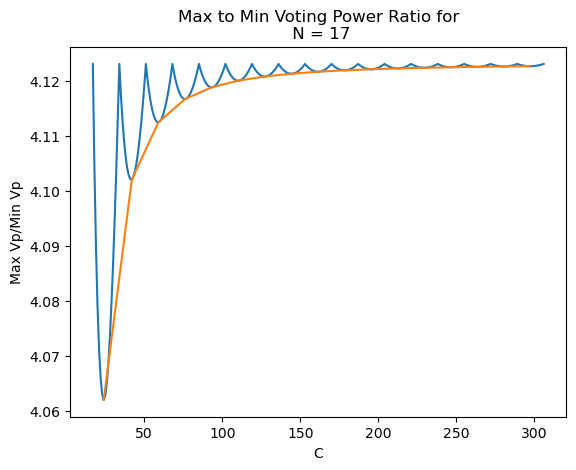

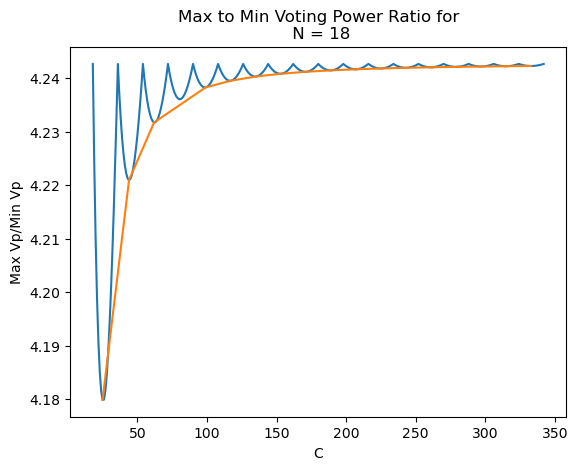

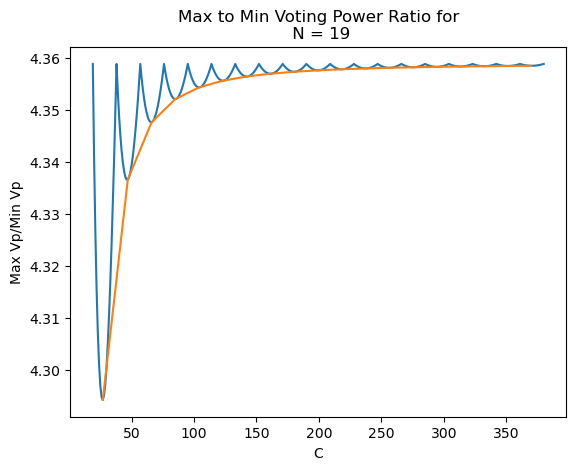

Note on Below: 


In [7]:
# Example III.2.a(4): Plotting Ratio of Max to Min Voting Power 
# Loop over each N to determine max to min voting power ratio for a set of C
for N in range(3,20):
    # Initiate some data holders
    ratio = [] # Ratio of max to min Voting Power
    xval = [] # Used for the orange line that tracks the minimums, purely for visual
    minimums = [] # Minimums of the rato graphs
    Cs = [] # Holds the C value (needed for proper graphing)
    
    # Loop over C in a reasonable range, N to N^2+N+1, to get ratios
    for C in range(N,(N**2+N+1)):
        # Get minimum Vp
        min_VP = C**.5

        # Get maximum Vp
        a = C // N
        b = C % N
        max_VP = b*(a+1)**.5 + (N-b)*a**.5
        
        # Append the ratio data holder for this N & C combination
        Cs.append(C)
        ratio.append(max_VP/min_VP)
    
    # Identify the x and ratio numbers for the local minimums
    for r in range(1,len(ratio[:-1])):
        if (ratio[r-1] > ratio[r]) and (ratio[r+1] > ratio[r]):
            xval.append(r+N)
            minimums.append(ratio[r])
    
    plt.title(f'Max to Min Voting Power Ratio for\n N = {N}')
    plt.xlabel('C')  # Set x-axis label
    plt.ylabel('Max Vp/Min Vp')  # Set y-axis label    
    plt.plot(Cs, ratio)
    sns.lineplot(x = xval, y = minimums)
    plt.show()
print("Note on Below: ")

To understand the dynamics between different types of voters, we introduce the concept of **Concentrators** and **Spreaders**. These two groups represent generalized voting patterns:

1. **Concentrators:** These voters have strong preferences for a few, or even a single, issue. They are willing to sacrifice total voting power to exert more influence on their preferred issue's outcome. They focus their voting credits on fewer items, often using all their credits on a single voting item.

2. **Spreaders:** These voters do not have strong preferences and might not even care deeply about the election at hand. Ironically, they end up wielding the most total voting power due to their strategy of evenly distributing their voting credits. From a systemic perspective, this extra power can be seen as a compensatory measure to encourage participation and elicitation of a full set of societal preferences, however minimal.

An important note is that both groups seek to maximize their voting power in accordance with their underlying preferences. This simplification allows us to measure fairness by optimizing across a single dimension.

Based on the observations made earlier, we have different pressures from these two types of voters. Spreaders favor a total number of credits that evenly divides into the number of voting items (C%N = 0), as it allows them to maximize their voting power. On the other hand, Concentrators prefer C to be as close as possible to the middle of two factors of N, and also advocate for the smallest feasible C. This is because a lower C reduces the absolute difference in voting power between Concentrators and Spreaders.

In essence, the challenge lies in finding a C that strikes a balance between these opposing pressures, thus ensuring that the voting system remains fair and expressive for all voters.

## III.2.b Minimum Difference Formula

Voters should be able to differentiate between all voting items. Therefore, the smallest number of credits that should be assigned is the amount that allows each voting item to possess a distinct amount of voting power from all other voting items. Given that this is a polar vote, -1 is distinguishable from 1. For instance, when N = 6, the strategy [-3,-2,-1,0,1,2] is equivalent in magnitude to [3,2,2,1,1,0]. Here, the total credits required, 9, represents the minimum number of credits necessary to differentiate items, and hence is the lowest feasible value for C.

The formula to calculate the minimum credits varies slightly depending on whether the number of items (N) is even or odd. As zero counts as a voting item, odd numbers generate symmetric minimum strategies centered around zero. For instance, when N = 7, the minimum differentiation strategy is [-3,-2,-1,0,1,2,3] and for N = 9 it's [-4,-3,-2,-1,0,1,2,3,4]. Thus, the total credits for odd numbers can be calculated as:

## $C = \sum_{i=1}^{(N-1)/2} 2i$

Even numbers, on the other hand, are slightly asymmetric. This is because one side of zero will have an absolute integer value that's one higher than the other side of zero. For example, when N = 8, the minimum differentiation strategy is [-3,-2,-1,0,1,2,3,4]. The total credits for even numbers are calculated as:

## $C = \sum_{i=1}^{(N-2)/2} 2i + \frac{N}{2}$

#### These summations are equivalent to:

> ## $C = (\frac{N}{2})^2$ for even N

> ## $C = \frac{N^2-1}{4}$ for odd N

They can be graphed together into one "continuous" line:

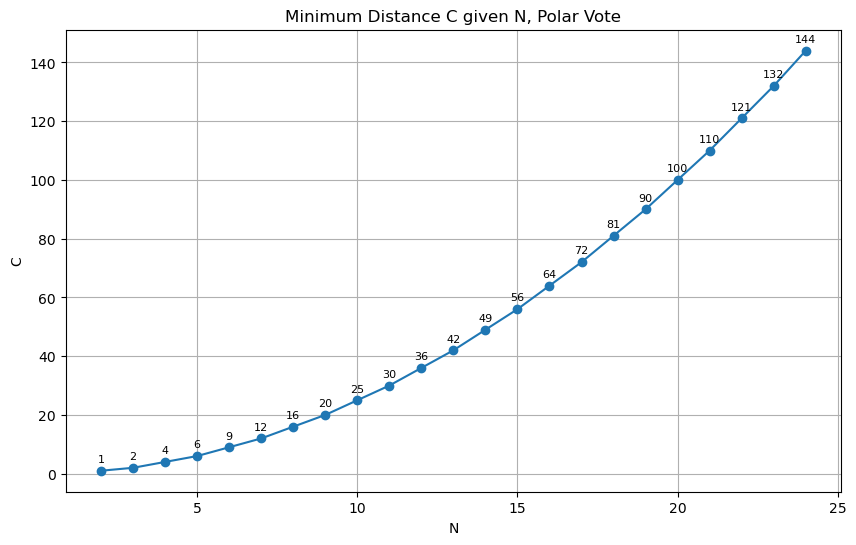

In [8]:
# Figure III.2.b: Plot of minimum number of C for differentation of all voting items.
N_values = list(range(2, 25))
C = []

for N in N_values:
    if N % 2 == 0:
        C.append((N / 2) ** 2)
    else:
        C.append((N ** 2 - 1) / 4)

C = [int(x) for x in C]

plt.figure(figsize=(10, 6))
plt.plot(N_values, C, marker='o')
plt.xlabel('N')
plt.ylabel('C')
plt.title('Minimum Distance C given N, Polar Vote')
plt.grid(True)

# Adding text annotations for each point
for i in range(len(N_values)):
    plt.annotate(C[i], (N_values[i], C[i]), textcoords="offset points", xytext=(0,6), ha='center', fontsize=8)

plt.show()

### III.2.b.i. Minimum Difference Formula for Priority QV.

While we are focusing on a Polar Vote, we can examine Priority voting as well since it is fairly straightforward.  In fact, positive-only numbers are much simpler, as they always range from 0 to N-1:

### $C = \sum_{i=1}^{(N-1)} i$

which in turn equals

> ## $C = \frac{N^2-N}{2}$  for all N.

## III.2.c. Finding Analytical C

To this point we have determined:
1. Spreaders like a high C and concentrators like low C.
2. Spreaders like when the sum of the differences between the elements is minimized, concentrators like it maximized.
3. Both want as many or more credits than the minimim difference strategy requires.

The best number of credits C maintains a reasonable power balance between concentrators and spreaders (which might entail increasing C), but at the same time keeps C as low as possible to allow for differentiation without overwhelming the voters with too many credits.  Thus:
##### Spreaders will take a minimum C as long as the sum of the differences can be minimized to zero ($C \% N = 0$).

For example, when N = 7, the minimum difference is $\frac{(7^2 - 1)}{4} = 12$.  Plugging that into an empty strategy set in base strategy form:

[2,2,2,2,2,1,1]

In order to fill this set with the same number for each voting item, we need to add 2.  Therefore C = 14.

Examining a number of different C we determine the general solution for a polar QV - when all voting items are the same and it is the smallest value *greater* than or equal to the minimum difference:

## $C = \left\lfloor \frac{N+3}{4} \right\rfloor \cdot N$,
*where the leftmost term of the equation is the floor division of (N+3) // 4.*

#### III.2.c.i. C for Priority/Positive-Only Voting

For priority voting, $C \% N = 0$ is a null strategy.  Therefore, the maximum voting credits occurs when one voting item is +1 greater than the others.  Following the steps above from this the general solution to a priority vote is:

## $C = \left\lfloor \frac{N}{2} \right\rfloor \cdot N + 1$,
*where the leftmost term of the equation is the floor division of N // 2.*

For a table of C based on the above formulas:

In [9]:
# Table III.2.c: Table of C for N = 3 to N = 25.
df = []
for N in range(3,26):
    row={}
    row['N'] = N
    if N % 2 == 0:
        row['Polar Min Diff'] = int((N / 2) ** 2)
    else:
        row['Polar Min Diff'] = int((N ** 2 - 1) / 4)
    row['C, polar'] = (N+3)//4 * N
    row['||'] = '||'
    row['Priority Min Diff'] = int((N**2-N)/2)
    row['C, priority'] = (N//2)*N+1
    df.append(row)
df = pd.DataFrame(df).set_index('N')
print('Table of C for Polar and Priority QV, for N = 3 to N = 25')
display(df)

Table of C for Polar and Priority QV, for N = 3 to N = 25


,Polar Min Diff,"C, polar",||,Priority Min Diff,"C, priority"
N,,,,,
3,2,3,||,3,4
4,4,4,||,6,9
5,6,10,||,10,11
6,9,12,||,15,19
7,12,14,||,21,22
8,16,16,||,28,33
9,20,27,||,36,37
10,25,30,||,45,51
11,30,33,||,55,56


##### $C_{priority} > C_{polar}$ for all $N$ makes sense as larger numbers are required for differentiation in positive only voting.

# Thus, we propose C = (N+3)//4  * N as the Polar solution . 
##### We also propose C = (N//2) * N + 1 as the Priority solution.
Let's see how computational approaches compare...

-----

# III.3) Computational Approach

The computational approach to optimizing a polar QV comprises several steps, with each step correlating to one or more developed functions. These functions were iteratively created, tested, and then incorporated inline into the notebook. This step-by-step approach allows for better visibility into the mechanics of the process while maintaining a functional and interactive notebook. A standalone Python file containing these functions (qv_1.py) is also available on [Github](https://github.com/Miller-Ryan-1/quadratic-voting), and a browser-runnable notebook can be found on [Google Collab](https://colab.research.google.com/drive/1t_mypRLKpeYCAkg13p3IdUltno6rNOSB?usp=sharing).

Here is an outline of the steps involved in this computational approach:

1. **Determine the base strategy sets:** For a given N and C, identify all possible base strategy sets.

2. **Analyze the strategy sets:** Utilizing the list of all base strategy sets:
    1. Calculate the total number of unique strategies (or polar permutations) represented by each base strategy.
    2. Create a data structure that contains all base strategies and their respective voting power. It should also include a count of polar permutations for each base strategy.
    3. Using the number of polar permutations of each base strategy, "weigh" the different voting power outcomes based on their relative frequency. From this, determine the mean weighted voting power for the given C and N. The mean weighted voting power reflects the average voting power when every possible strategy is voted on once and only once.

3. **Compare strategy sets for multiple C values:** Get strategy details for multiple instances of C for a given N. 

4. **Simulate Ballots:** Based on N and C, simulate the outcomes of casting votes to integrate into analysis.

5. **Scoring C for N:** Assign a score to each instance of C for a given N.

## III.3.a. Determine the base strategy sets for a given N and C
*In other words, what are the combinations of N-integers whose **magnitudes** sum to C.*

In [10]:
def base_strategy_set_of(N, C):
    '''
    Give me an integer N to define an array length, and an integer C to tell me what the sum of
    the magnitudes of those N-integers MUST be.
    
    I return a list of base strategy sets: N-length arrays whose elements sum to C.  
    These base strategies are all possible combinations of integers, conventionally expressed as magnitudes
    (to account for negative votes) from the largest integer to the smallest or zero.  Duplicates are removed.
    '''
    # Generate all combinations of N integers that equal C, to include zeros.
    dp = [[[] for _ in range(C+1)] for _ in range(N+1)]
    for i in range(C+1):
        dp[1][i] = [[i]]
    for n in range(2, N+1):
        for c in range(1, C+1):
            for i in range(c+1):
                for subgroup in dp[n-1][c-i]:
                    group = [i] + subgroup
                    group.sort(reverse=True)
                    if group not in dp[n][c]:
                        dp[n][c].append(group)
    strategy_set = dp[N][C]

    return strategy_set

In [11]:
# Example III.3.a(1): What are the base strategies for N = 3 and C = 16?
N, C = 3, 16
base_example_1 = base_strategy_set_of(N, C)
len(base_example_1), base_example_1

(30,
 [[16, 0, 0],
  [15, 1, 0],
  [14, 2, 0],
  [13, 3, 0],
  [12, 4, 0],
  [11, 5, 0],
  [10, 6, 0],
  [9, 7, 0],
  [8, 8, 0],
  [14, 1, 1],
  [13, 2, 1],
  [12, 3, 1],
  [11, 4, 1],
  [10, 5, 1],
  [9, 6, 1],
  [8, 7, 1],
  [12, 2, 2],
  [11, 3, 2],
  [10, 4, 2],
  [9, 5, 2],
  [8, 6, 2],
  [7, 7, 2],
  [10, 3, 3],
  [9, 4, 3],
  [8, 5, 3],
  [7, 6, 3],
  [8, 4, 4],
  [7, 5, 4],
  [6, 6, 4],
  [6, 5, 5]])

In [12]:
# Example III.3.a(2): How many base strategy sets are the for N = 6 and C = 37?
N, C = 6, 37
base_example_2 = base_strategy_set_of(N, C)
len(base_example_2)

2702

(N,C) = (3,16) has 30 base strategies.  (N,C) = (6,49) has 2702.  Thus, the total number of base strategies becomes very large very fast.  My humble Macbook Air is limited to Nmax ~ 8 and C ~ 50, so numbers would be limited to extrapolated conjectures.  Below graphs N from 3 to 6 for a range of C that the optimal should exist in.

*Note: The general solution to total number of base strategies is a challenging type of problem know as a [partition problem](https://en.wikipedia.org/wiki/Partition_problem) and is an area of further research.*

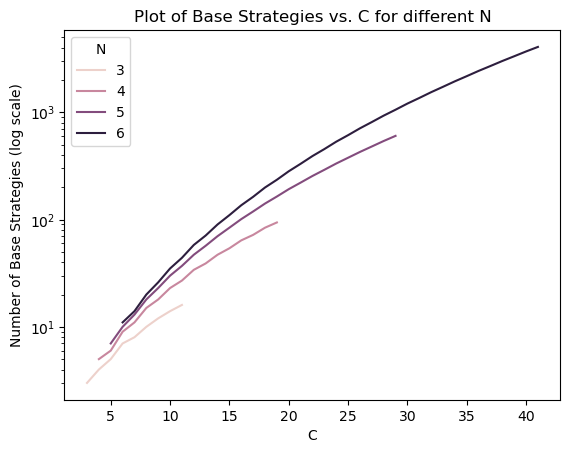

In [13]:
# Figure III.3.a: Log plot of base strategy counts vs C for different N.

# Create the return object
strat_nums = []

# Get number of base strategies given an N and C
for N in range(3,7):
    for C in range(N, N**2+N):
        row = {'N':N,
               'C':C,
               'base_strats':len(base_strategy_set_of(N, C))
              }
        strat_nums.append(row)
        
# Put into dataframe since its easiest to work with
strat_nums = pd.DataFrame(strat_nums)

# Initialize the lineplot
sns.lineplot(data = strat_nums, x = 'C', y = 'base_strats', hue = 'N')
plt.yscale('log')

# Add labels and title
plt.xlabel('C')
plt.ylabel('Number of Base Strategies (log scale)')
plt.title('Plot of Base Strategies vs. C for different N')

# Show plot
plt.show()

The number of base strategies for a given N and C go up rapidly as both N and C go up.  

## III.3.b. Calculate total number of unique stategies represented by each base strategy
While voting power is driven by base strategies, a method is needed to determine how many possible permutations there are of each set of numbers in a base strategy.  With polar voting, we must include every permutation involving the positive and negative of each non-zero element as well.  This allows for a weighted mean of voting power to take place.

The total permutations for a given base strategy is simply all permutations of the voting elements within the strategy for positive-only priority voting, with that permutation count then multiplied by $2^i$ for polar voting, where $i =$ number of non-zero elements.  This latter $2^i$ part accounts for the positive and negative possibilities of each non-zero element in a polar vote.

### Total Permutations of a Base Strategy $= \frac{N!}{(\text{freq}_{element_1}!) \times ... \times (\text{freq}_{element_n}!)} \times 2^{p \times i}$,

where $\text{freq}_{element}$ is the number of times a number appears in the strategy (including zero), $i$ is the total number of non-zero elements, and $p = 1$ for a polar QV and $p = 0$ for priority.

### III.3.b.i. Step 1: Given a strategy of length N, return a list of integers representing the frequencies of different integers in strategy.  Also return an integer representing the number of zeros in the strategy.  
*Note: this does not tie the actual values to their frequencies, as actual values are unecessary.*

In [14]:
def element_frequencies(strategy):
    '''
    Give me a base strategy (array of integers).
    
    I return a list of the frequencies of each of the non-zero integers along with the count 
    of zeros, if any.  The returns are used to determine the number of combinations for the strategy.
    '''
    # Initialize data holders
    strat_dict = {}
    zeros = 0
    
    # Loop through each integer in the base strategy
    for element in strategy:
        # if its a zero, increase zero count holder
        if element == 0:
            zeros += 1
            continue
        # If the element has already been seen, increase its count, otherwise add it to dictionary
        if element in strat_dict.keys():
            strat_dict[element] += 1
        else:
            strat_dict[element] = 1
    
    frequencies = list(strat_dict.values())
    
    return frequencies, zeros

In [15]:
# Example III.3.b.i: Get element frequencies for a sample strategy.
be5 = base_example_2[5]
be5, element_frequencies(be5)

([32, 5, 0, 0, 0, 0], ([1, 1], 4))

### III.3.b.ii. Step 2: Using the frequencies and count of zeros, get a count of all possible strategies given a base strategy.
Note: Unlike base strategies, element identity matters - thus [-2,1,3] is different than [1,3,-2]).

In [16]:
def count_of_all_possible_permutations_of(strategy, p=1):
    '''
    Give me a base strategy (array of integers).  Also give p=1 (default) for polar and p=0 for priority QV.
    
    That base strategy can then be used to find polar permutations (where one or more signs
    are flipped on positive integers in the base strategy) as well as all permutations of other numbers.
    When summed for all base strategies of a given N and C, the total number of possible voting
    options are given.
    
    Thus, I return a count of all NON-NULL polar permutations.
    '''
    # Get the element group details 
    frequencies, zeros = element_frequencies(strategy)
    
    # Calculate the total permutations of the numbers of the strategy
    # N! / (a! * b! * ... * x!...) where a,b,... are pulled from frequency list, and x is the count of zeros
    total_perms = math.factorial(len(strategy))//(math.prod([math.factorial(x) for x in frequencies])*math.factorial(zeros))  
    
    # If polar (p=1) each number can be represented as positive or negative, so count = 2^total number of non-zeros
    # If priority this term zeros out
    polar_strat_count = 2**(sum(frequencies)*p)

    # Multiply the two together
    total_count_of_sets = total_perms * polar_strat_count
    
    # Account for null strategies, if the base has any:
    if len(set(strategy)) == 1:
        # For polar there are two null strategies [n,n,...,n] and [-n,-n,...,-n], for priority just 1
        if p == 1:
            total_count_of_sets -= 2
        else:
            total_count_of_sets -= 1

    return total_count_of_sets

In [17]:
# Example III.3.b.ii(1): How many total polar permutations are there for a given strategy?
count_of_all_possible_permutations_of([16,4,4,2,1,0,0,0])

107520

Check:

In [18]:
# Example III.3.b.ii(2): How many polar permutations are there for an identically structured strategy, 
# using the Total Permutations of a Base Strategy equation?
base_strategy = [24,20,6,6,1,0,0,0]
# N = 8
# Non-zero, i = 5
# frequencies = [1,1,2,1,3]
# count = (8! / (1! * 1! * 2! * 1! * 3!)) * 2**5
(8*7*6*5*2) * 2**5

107520

In [19]:
# Example III.3.b.ii(3): Check of above.
count_of_all_possible_permutations_of(base_strategy)

107520

In [20]:
# Example III.3.b.ii(4): How many priority permutations of this base strategy are there?
count_of_all_possible_permutations_of(base_strategy,p=0)

3360

In [21]:
# Example III.3.b.ii(5): What is the total number of polar strategies (all permutations of base strategies)
# for a range of N and C?
total_strat_counts = []

# Get the base strategies given an N and C
for N in range(3,7):
    # Manually used 41 to compare all N out the same distance
    for C in range(N, 41):
        base_strategies = base_strategy_set_of(N, C)
        strat_sum = 0
        for strategy in base_strategies:
            strat_sum += count_of_all_possible_permutations_of(strategy)  
            
        row = {'N':N,
               'C':C,
               'total_strats':strat_sum
              }
        total_strat_counts.append(row)
total_strat_counts

[{'N': 3, 'C': 3, 'total_strats': 36},
 {'N': 3, 'C': 4, 'total_strats': 66},
 {'N': 3, 'C': 5, 'total_strats': 102},
 {'N': 3, 'C': 6, 'total_strats': 144},
 {'N': 3, 'C': 7, 'total_strats': 198},
 {'N': 3, 'C': 8, 'total_strats': 258},
 {'N': 3, 'C': 9, 'total_strats': 324},
 {'N': 3, 'C': 10, 'total_strats': 402},
 {'N': 3, 'C': 11, 'total_strats': 486},
 {'N': 3, 'C': 12, 'total_strats': 576},
 {'N': 3, 'C': 13, 'total_strats': 678},
 {'N': 3, 'C': 14, 'total_strats': 786},
 {'N': 3, 'C': 15, 'total_strats': 900},
 {'N': 3, 'C': 16, 'total_strats': 1026},
 {'N': 3, 'C': 17, 'total_strats': 1158},
 {'N': 3, 'C': 18, 'total_strats': 1296},
 {'N': 3, 'C': 19, 'total_strats': 1446},
 {'N': 3, 'C': 20, 'total_strats': 1602},
 {'N': 3, 'C': 21, 'total_strats': 1764},
 {'N': 3, 'C': 22, 'total_strats': 1938},
 {'N': 3, 'C': 23, 'total_strats': 2118},
 {'N': 3, 'C': 24, 'total_strats': 2304},
 {'N': 3, 'C': 25, 'total_strats': 2502},
 {'N': 3, 'C': 26, 'total_strats': 2706},
 {'N': 3, 'C':

*Note: Null strategies are removed from consideration.*

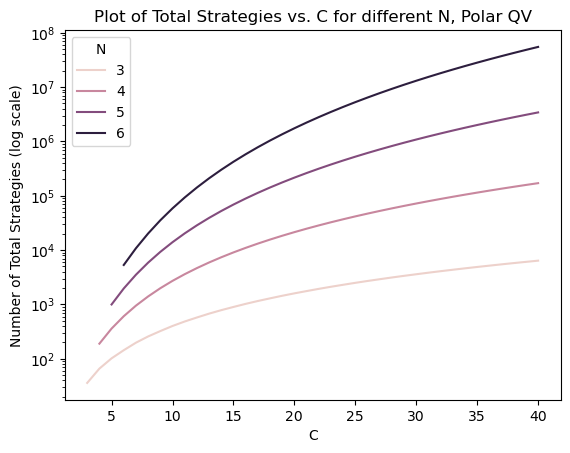

In [22]:
# Figure III.3.b.ii: Log plot of base strategy counts vs C for different N.

# Put into dataframe since its easiest for me to work with
total_strat_counts = pd.DataFrame(total_strat_counts)

# Initialize the lineplot
sns.lineplot(data = total_strat_counts, x = 'C', y = 'total_strats', hue = 'N')
plt.yscale('log')

# Add labels and title
plt.xlabel('C')
plt.ylabel('Number of Total Strategies (log scale)')
plt.title('Plot of Total Strategies vs. C for different N, Polar QV')
# Show plot
plt.show()


The number of total strategies for a given N and C go up extremely rapidly as both N and C go up.  Thus, while not as flexible as continuous credits, discrete credits can still be as effective in most circumstances.  

## III.3.c. Given an N and a C, create a dataframe showing all base strategies and their voting power.  Also, add a count of polar permutations.

In [23]:
def get_strategy_details_for(N,C):
    '''
    Give me an integer N for number of voting items and integer C for voice credits available.
    
    I return a dataframe listing each strategy and it's voting power, along with the total number of 
    occurances of each strategy in the entire set of possibilities (total number of polar permutations).
    '''
    # Initilize a data holder - list that will eventually become a dataframe
    result = []
    
    # Get the base strategies
    base_strategies = base_strategy_set_of(N,C)
    
    # Loop through each strategy, get some key info on it, and add it to future dataframe
    for strategy in base_strategies:
        voting_power = sum([x**.5 for x in strategy])

        total_strat_count = count_of_all_possible_permutations_of(strategy)
            
        row = {'N':N,
               'C':C,
               'strategy':strategy,
               'VP':voting_power,
               'perms':total_strat_count}

        result.append(row)
        
    result = pd.DataFrame(result)
    
    # Now sort by maximum concentration to maximum spread:
    result = result.sort_values(by = 'VP')
    
    return result

In [24]:
# Example III.3.c: Given N = 5 and C = 21, identify all the base strategies, calculate their voting power,
# and then give the total number of polar permutations (perms) of that that base strategy.
df = get_strategy_details_for(5,21)
df

,N,C,strategy,VP,perms
0,5,21,"[21, 0, 0, 0, 0]",4.582576,10
1,5,21,"[20, 1, 0, 0, 0]",5.472136,80
2,5,21,"[19, 2, 0, 0, 0]",5.773113,80
3,5,21,"[18, 3, 0, 0, 0]",5.974691,80
4,5,21,"[17, 4, 0, 0, 0]",6.123106,80
...,...,...,...,...,...
216,5,21,"[6, 5, 4, 3, 3]",10.149659,1920
217,5,21,"[5, 5, 5, 3, 3]",10.172306,320
218,5,21,"[6, 4, 4, 4, 3]",10.181541,640
219,5,21,"[5, 5, 4, 4, 3]",10.204187,960


In [25]:
len(df), sum(df.perms)

(221, 262250)

Thus there are 221 unique Voting Power outcomes out of 262,250 total strategies when N = 5 and C = 21.

## II.3.d. Find the Weighted Mean and Median Voting Strategies

### III.3.d.i. Weighted Mean
Using the number of polar permutations of each base strategy, weigh the different voting power outcomes and determine the mean weighted voting power for a given C and N (that is the mean voting power when every possible strategy is voted on once and only once).

In [26]:
def integrate_strategy_density(df):
    '''
    Give me a dataframe with strategy details for a given N and C.
    
    I return the dataframe with each Voting Power-related column weighted based
    on the number of polar permutations of the base strategy compared to the total number
    of all polar permuations of every strategy in (N,C).
    '''
    # Get the total number of strategy options for a given N and C
    total_perms = sum(df['perms'])

    df['VP_wtd'] = df['VP'] * df['perms'] / total_perms
    
    return df

In [27]:
# Example III.3.d.i(1): What is each base strategy set's contribution to the total voting power if each strategy is
# voted on once and only once?
df = integrate_strategy_density(df)
df

,N,C,strategy,VP,perms,VP_wtd
0,5,21,"[21, 0, 0, 0, 0]",4.582576,10,0.000175
1,5,21,"[20, 1, 0, 0, 0]",5.472136,80,0.001669
2,5,21,"[19, 2, 0, 0, 0]",5.773113,80,0.001761
3,5,21,"[18, 3, 0, 0, 0]",5.974691,80,0.001823
4,5,21,"[17, 4, 0, 0, 0]",6.123106,80,0.001868
...,...,...,...,...,...,...
216,5,21,"[6, 5, 4, 3, 3]",10.149659,1920,0.074308
217,5,21,"[5, 5, 5, 3, 3]",10.172306,320,0.012412
218,5,21,"[6, 4, 4, 4, 3]",10.181541,640,0.024847
219,5,21,"[5, 5, 4, 4, 3]",10.204187,960,0.037354


In [28]:
# Example III.3.d.i(2): What is the weighted mean voting power for a df of a given C and N.
print(f'Weighted Mean = {df.VP_wtd.sum()}')

Weighted Mean = 9.122712997573144


###  III.3.d.ii. Finding a Median VP

The analysis explores two types of median VP values: a simple median and a weighted median. Each of these provides a different perspective on the distribution of voting power among the strategy sets.

1. **Simple Median:** This median value is calculated by first sorting the **base strategies** by their voting power. From this ordered list, the median base strategy and its associated voting power are identified. The simple median can provide insights into the middle-point of voting power distribution among the strategies, without considering the frequency of each strategy.

2. **Weighted Median:** This median calculation is a bit more complex, considering not just the voting power of each base strategy, but also how frequently each strategy occurs (the 'weight'). The weighted median is determined by finding the base strategy that includes the strategy where the sum of the weighted voting power accounts for half of the total voting power. The weighted median can provide a more representative perspective on the typical voting power, as it takes into account each strategy possible.

These two different types of medians can help us gain a deeper understanding of the distribution of voting power within a polar voting system, offering different viewpoints on the balance (or imbalance) of voting power.

In [29]:
def get_simple_median(df):
    '''
    Give me a dataframe with strategy details for a given N and C.
    
    I return the Voting Power of the base strategy that represents median voting power for that N and C using
    the index of the median strategy going from min to max voting power.
    '''
    middle = int(len(df) / 2) - 1
    VP_s_med = df.VP.iloc[middle]

    return VP_s_med

In [30]:
# Example III.3.d.ii(1): Finding the Simple median Voting Power.
print(f'Simple Median = {get_simple_median(df)}')

Simple Median = 8.894328467737257


In [31]:
def get_weighted_median(df):
    '''
    Give me a dataframe with strategy details for a given N and C.
    
    I return the Voting Power of the base strategy that represents median voting power for that N and C using
    the index of the median permutation going from min to max voting power.
    '''
    # Find the median permutation
    median_perm = int(sum(df.perms) / 2)
    
    # Now loop through until you hit the base strategy the median permutation occurs in
    for row in df.index:
        # Get count of perms and subtract it from the running count of half the total permutations
        row_perms = df['perms'].iloc[row]
        median_perm -= row_perms
    
        if median_perm <= 0:
            strategy = df.strategy.iloc[row]
            #print(f'Weighted median for N,C = ({df.N.iloc[row]},{df.C.iloc[row]}) occurs at {strategy}')
            VP_w_med = sum([x**.5 for x in strategy])
            break
    
    return VP_w_med

In [32]:
# Example III.3.d.ii(2): Finding the Weighted mean Voting Power.
print(f'Weighted Median = {get_weighted_median(df)}')

Weighted Median = 9.796545909814856


## III.3.e. Combine all VPs for a given N & C into a single row

### III.3.e.i. Given a df of N, C, along with median and mean weighted VPs, condense into one row

In [33]:
def C_details(df):
    '''
    Give me a weighted N,C strategy details dataframe.
    
    In return I give you a condensed outcomes row for N and C, aggregating for Vp_wtd.  Vp_wtd = the average voting
    power if every possible strategy is voted on once and only once.
    '''
    VP_s_med = get_simple_median(df)
    VP_w_med = get_weighted_median(df)
    VP_max = df.VP.max()
    
    # Simplify
    df = df.drop(columns = ['VP'])
    
    # Extract N and C
    N = df.N.max()
        
    C_for_N = df.groupby('C').sum()
    
    C_for_N['N'] = N
    
    C_for_N['VP_s_med'] = VP_s_med
    
    C_for_N['VP_w_med'] = VP_w_med
    
    C_for_N['VP_max'] = VP_max
    
    return C_for_N

In [34]:
# Example III.3.e.i: VP details of N = 5 and C = 21.
C_details(df)

,N,perms,VP_wtd,VP_s_med,VP_w_med,VP_max
C,,,,,,
21,5,262250,9.122713,8.894328,9.796546,10.236068


### III.3.e.ii. Combine the above functions to analyze multiple C for a single N

In [35]:
def C_for_N_sets(N, Cmin, Cmax):
    '''
    Give me N, the length of the Decision Space/Number of ballot items, as well as the minimum C and maximum C 
    which to analyze between (inclusive).
    
    I return a dataframe with each C analyzed (from C = Cmin to C = Cmax).
    '''
    # Initialize a return dataframe
    df = pd.DataFrame()

    # Start with C == N, loop through to Cmax
    for c in range(Cmin, Cmax + 1):
        # Generate Base Strategies and Info for N and c
        df_c = get_strategy_details_for(N,c)
        df_c = integrate_strategy_density(df_c)
        df_c = C_details(df_c)
        
        df = pd.concat([df,df_c])
    df['VP_min'] = df.index**.5
    # Clean up before return
    df = df[['N','perms','VP_min','VP_s_med','VP_wtd','VP_w_med','VP_max']]
    df = round(df,3)

    return df 

In [36]:
# Example III.3.e.ii: Get C for N detail dataframe for N = 5, and C > 4 & C < 27.
N = 5
df = C_for_N_sets(N,N,N**2+1)
df

,N,perms,VP_min,VP_s_med,VP_wtd,VP_w_med,VP_max
C,,,,,,,
5,5,1000,2.236,3.146,3.891,3.828,5.000
6,5,1970,2.449,4.000,4.408,4.243,5.414
7,5,3530,2.646,4.414,4.871,5.000,5.828
8,5,5890,2.828,4.828,5.295,5.414,6.243
9,5,9290,3.000,5.146,5.686,5.732,6.657
10,5,14000,3.162,5.646,6.052,6.146,7.071
11,5,20330,3.317,6.060,6.396,6.414,7.389
12,5,28610,3.464,6.449,6.721,6.692,7.707
13,5,39210,3.606,6.792,7.031,7.000,8.025


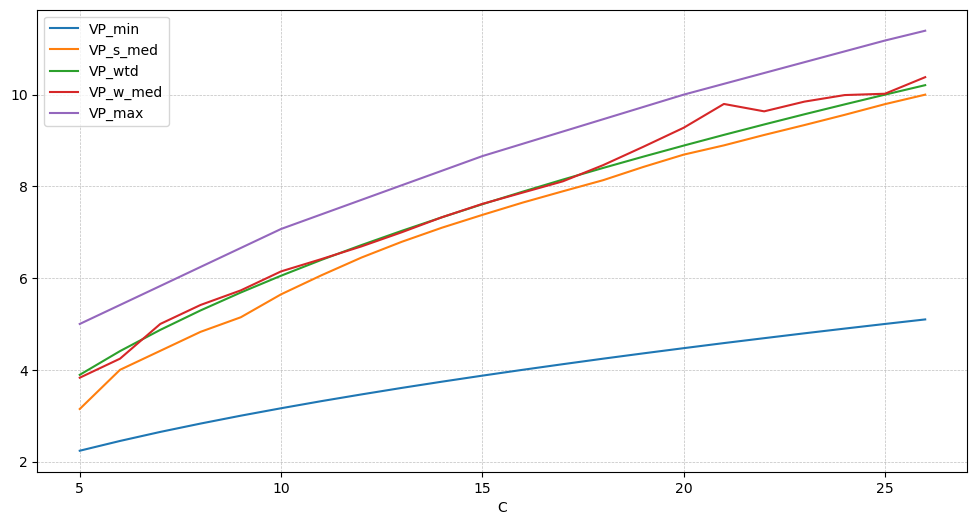

In [37]:
# Figure III.3.e.ii: Graph of notable VPs for N = 5, and C > 4 & C < 27.
df[['VP_min', 'VP_s_med', 'VP_wtd', 'VP_w_med', 'VP_max']].plot(figsize = (12,6))
plt.grid(color='gray', linestyle='dashed', linewidth=0.5, alpha=0.5)
plt.show()

## III.3.f. Simulate Ballots

In addition to the methods above to find the maximum, minimum, weighted average, and median (weighted and simple) voting power of a given N & C, we can also use simulated votes to further build, refine and test a "scoring system" to determine which C is best.

Simulating votes serves as a practical way to understand and validate the theoretical analyses done so far. It provides a representation of how a real-world voting scenario may play out, given the specific N and C values. It helps us to examine the distribution of voting power and possibly to understand the effectiveness of a particular scoring system.

The process of simulation is fairly straightforward.  Given a set number of issues (N) and total credits (C), simulate a vote by distributing credits randomly across the voting stategy choices.  This voting simulation is repeated multiple times to represent an electorate.

By simulating an electorate, we are able to study the behavior and outcomes of a polar voting system in a more realistic context, further informing the evaluation and refinement of the scoring system to determine the best C for a given N.

### III.3.f.i. Step 1: Single Ballot

The first element of each vote is selected randomly from a range of 0 to C, inclusive. Subsequent elements follow the same process, with the remaining credits adjusted each time until all credits are allocated. The final element receives any remaining credits.

After assigning credits to each issue, the vote is randomized by shuffling the elements. The elements are then randomly negated, allowing for both positive and negative votes, to simulate the polar nature of the voting system. 

In [38]:
def simulated_vote(N,C,w=2):
    '''
    Give me integers N and C and optionally integer 'w' which is the ratio of positive to negative votes.
    
    I return a simulated voting strategy (array). 
    '''
    # Output holder
    strategy = []

    # For all but last element pick a random number from credits left
    for n in range(N-1):
        credits_used = random.randint(0,C)
        C -= credits_used
        strategy.append(credits_used)
    
    # If there are any credits left use them up, otherwise append 0
    if C > 0:
        strategy.append(C)
    else:
        strategy.append(0)

    # Now randomly sort the strategy
    np.random.shuffle(strategy)
        
    # Now randomly negate a certain percentage of the strats
    negatizer = random.choices([-1, 1], weights=[1, w], k=N)
    
    # Apply negatizer
    strategy = np.multiply(strategy, negatizer)
    
    return strategy 

In [39]:
# Example III.3.f.i: Simulated ballot for for N = 8 and C = 64.
print('Empty ballot:\n[_,_,_,_,_,_,_,_]\n\nSimulated ballot:')
print(list(simulated_vote(8,64)))

Empty ballot:
[_,_,_,_,_,_,_,_]

Simulated ballot:
[14, 0, 25, 0, 0, 25, 0, 0]


##### Note on 'w':
The 'w' value is an important factor in the simulation of voting strategies as it provides a representation of the ratio of positive to negative votes. This is a key aspect in polar voting systems where voters can express their preferences in either a positive (approval) or negative (disapproval) manner. 

The assumption that most people will have a bias towards positive voting (approvals) rather than negative voting (disapprovals) is based on observed behavior in real-world systems.  For example, on Reddit, a platform which also utilizes a form of polar voting, the ratio of positive (upvotes) to negative (downvotes) can range from 2:1 to 9:1, indicating a general preference for positive voting. This aligns with the understanding that humans often exhibit a positivity bias, preferring to express approval rather than disapproval.

However, it's worth noting that this is an active area of research, and the actual preferences of voters in different contexts can vary. For the purpose of the current analysis, several 'w' values (ranging from 1:1 to 4:1) were tested, and the overall results were found not to vary significantly. In later stages of the analysis, these ratios are converted to absolute values, further reducing their impact on the final outcomes.

It's also worth noting that the exact ratio may vary depending on the specific voting system, the context of the vote, and the preferences of the voters, all of which can influence voting behavior. As such, while the 'w' value provides a useful model for simulating voting behavior, it should be treated as a variable that can be adjusted to better match the specific context under study.

### III.3.f.ii. Given a large number of voters, calculated the average voting power based on their votes given an N and C.

In [40]:
def simulated_voting_power(N, Cmax, voters, w = 2):
    '''
    Give me integers N, the Cmax to examine up to, the w to use, and a number of voters.

    I return a dictionary of the mean voting power based on the simulated votes.
    '''
    # Create a holder for the simulated strategies for each C
    ballots = {}
    for C in range(N,Cmax+1):
        votes = []
        for _ in range(voters):
            # Simulate a vote
            p = simulated_vote(N,C,w=w)
            
            # Reset to a base strategy
            p = [abs(x) for x in p]
            p.sort(reverse = True)
            
            #Now add this representative base strategy
            votes.append(p)
            
        ballots[C] = votes
        
    VP_per_C = {}

    # Convert the strategies into voting power and return as a dictionary
    for i in ballots.keys():
        v = ballots[i]
        VP = [sum(x**.5 for x in inner_lst) for inner_lst in v]
        mean_VP = sum(VP)/voters
        VP_per_C[i] = round(mean_VP ,5)
        
    return VP_per_C

In [41]:
# Example III.3.f.ii: Get simulated mean VP per C when N = 5, 4 < C < 27, 20k voters 
# and 2:1 positive to negative votes.
VP_per_C = simulated_voting_power(5, 26, 50000, w = 2)
VP_per_C

{5: 3.20619,
 6: 3.60248,
 7: 3.96947,
 8: 4.31208,
 9: 4.63712,
 10: 4.94185,
 11: 5.22975,
 12: 5.50835,
 13: 5.76696,
 14: 6.04296,
 15: 6.27562,
 16: 6.51702,
 17: 6.74653,
 18: 6.97711,
 19: 7.18854,
 20: 7.38761,
 21: 7.61708,
 22: 7.8118,
 23: 7.99198,
 24: 8.19135,
 25: 8.39784,
 26: 8.58095}

The object returned is a dictionary with C as the keys and the simulated average voting power as the values.  This can easily be mapped onto the non-simulated results.

### III.3.f.iii. Combining the simulated ballots to the generated weighted mean

In [42]:
def add_simulations(df, VP_per_C):
    '''
    Give me a dataframe of (N,C) results as well as the simulated voting power dictionary.

    I return the df with the simulated voting power.
    '''
    df['VP_sim_mean'] = df.index.map(VP_per_C)
    
    # Reorder from smallest VP to largest
    df = df[['N','perms','VP_min', 'VP_sim_mean','VP_s_med', 'VP_wtd', 'VP_w_med', 'VP_max']]
    
    return df

In [43]:
# Example III.3.f.iii: Add simulations from previous examples.
df = add_simulations(df, VP_per_C)
df

,N,perms,VP_min,VP_sim_mean,VP_s_med,VP_wtd,VP_w_med,VP_max
C,,,,,,,,
5,5,1000,2.236,3.20619,3.146,3.891,3.828,5.000
6,5,1970,2.449,3.60248,4.000,4.408,4.243,5.414
7,5,3530,2.646,3.96947,4.414,4.871,5.000,5.828
8,5,5890,2.828,4.31208,4.828,5.295,5.414,6.243
9,5,9290,3.000,4.63712,5.146,5.686,5.732,6.657
10,5,14000,3.162,4.94185,5.646,6.052,6.146,7.071
11,5,20330,3.317,5.22975,6.060,6.396,6.414,7.389
12,5,28610,3.464,5.50835,6.449,6.721,6.692,7.707
13,5,39210,3.606,5.76696,6.792,7.031,7.000,8.025


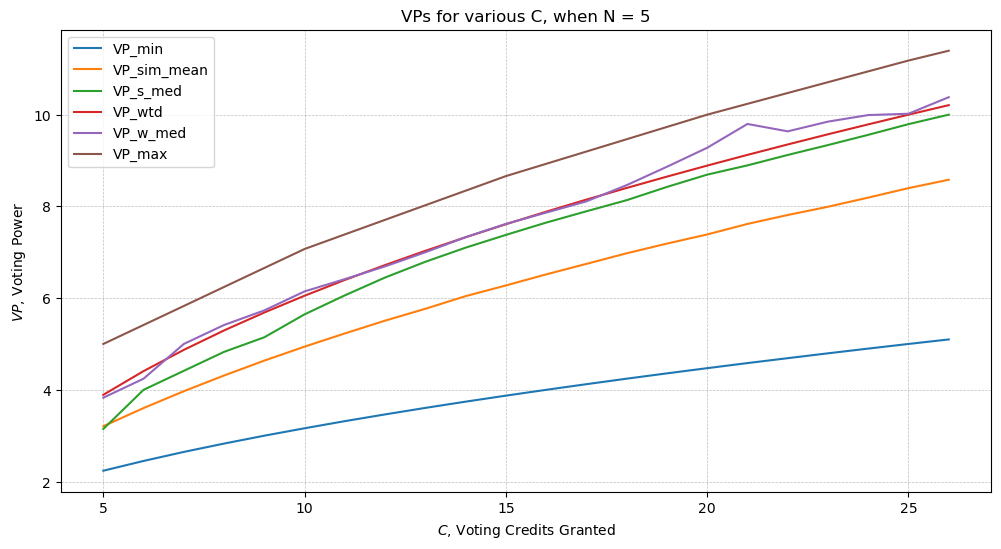

In [44]:
# Figure III.3.e.iii: Graph of VP for Various C at a given N.
N = df.N.max()
plt.figure(figsize = (12,6))
plt.title(f'VPs for various C, when N = {N}')
plt.plot(df.drop(columns = ['N','perms']))
plt.legend(['VP_min', 'VP_sim_mean', 'VP_s_med', 'VP_wtd', 'VP_w_med','VP_max'])
plt.grid(color='gray', linestyle='dashed', linewidth=0.5, alpha=0.5)
plt.ylabel('$VP$, Voting Power')
plt.xlabel('$C$, Voting Credits Granted')
plt.show()

## III.3.g. Scoring C for N

The computation for each set of N and C results in a comprehensive dataframe that captures the spectrum of voting power possible under these parameters. This output quantifies the maximum, weighted median, weighted mean, simple median, simulated mean, and minimum voting power, calculated from the possible strategies given the specific combination of N and C.

Here's a brief re-explanation of what each of these terms mean in order of (typically) highest to lowest VP:

- **Maximum voting power:** (VP_max) This represents the highest possible voting power achievable given the specific strategy under the set N and C conditions.
- **Weighted median voting power:** (VP_w_med) This metric provides the middle value of voting power after arranging all the strategies by their voting power, weighted by the number of permutations of each base strategy. This gives a measure of the "typical" voting power.
- **Weighted mean voting power:** (VP_wtd) This represents the average voting power across all strategies, with each strategy's contribution to the average proportional to the number of its permutations. 
- **Simple median voting power:** (VP_s_med) This represents the middle value of the voting power when all base strategies are lined up in order, without considering the weightage of their permutations.
- **Simulated mean voting power:** (VP_sim_mean) This represents the average voting power derived from a simulated set of votes based on the given N and C.
- **Minimum voting power:** (VP_min) This represents the lowest possible voting power achievable given the specific strategy under the set N and C conditions.

Please note that the median measures were added later on and need further investigation. The other four measures (max, min, weighted, and simulated) have been examined extensively, independent of the analytical solutions. Subsequent steps will involve comparing these measures in various ways to gain insights into the behavior of the voting system under different conditions.

### III.3.g.i. Scoring based on the relative voting power between weighted and simulated means.

The scoring method involves a comparison between the weighted mean voting power and the simulated mean. While an ideal scenario would involve a simulated number of votes equivalent to the polar permutations (so as to equal the number of ballots examined to derive the weighted mean), computational constraints necessitate limiting to 50,000 votes. We assume that this number is sufficient to yield representative results as per the central limit theorem.

As the product, difference, and sum between the weighted mean and simulated mean tend to grow with an increase in C, a scoring factor is derived by dividing the square of the weighted mean by the square of the simulated mean. The larger the value of this factor, the larger the relative voting power disparity, leading to a corresponding increase in the gap between concentrated and dispersed votes.

We then compute a score for each C by comparing its respective factor to the maximum observed factor. We designate a score of 100 to the maximum factor and calculate all other scores relative to this maximum. This rescaling process allows us to observe trends and comparisons more easily, instead of focusing on identifying the top scoring C or providing ratings on an absolute scale. By this method, we're able to spot and compare the top scores for each N.

In [45]:
def score(df):
    '''
    Give me a dataframe with Max, Min, Weighted and Simulated Mean Voting Power based on N and a range of C.
    
    I return the dataframe where the maximum proportional distance is scored as a 100, and all other C are
    scored in relation to that 100.
    '''
    df['wtd/sim factor'] = df['VP_wtd']**2 / df['VP_sim_mean']**2
    max_factor = max(df['wtd/sim factor'])
    df['Score'] = round((df['wtd/sim factor'] / max_factor) * 100,2)   
    
    df.drop(columns = ['wtd/sim factor'], inplace = True)
    
    df = df.sort_values(by = 'Score', ascending = False)
    
    return df

In [46]:
# Example III.3.g.i(1). Scoring for a single N, N=5.
score(df)

,N,perms,VP_min,VP_sim_mean,VP_s_med,VP_wtd,VP_w_med,VP_max,Score
C,,,,,,,,,
8,5,5890,2.828,4.31208,4.828,5.295,5.414,6.243,100.00
7,5,3530,2.646,3.96947,4.414,4.871,5.000,5.828,99.86
9,5,9290,3.000,4.63712,5.146,5.686,5.732,6.657,99.71
10,5,14000,3.162,4.94185,5.646,6.052,6.146,7.071,99.46
6,5,1970,2.449,3.60248,4.000,4.408,4.243,5.414,99.29
11,5,20330,3.317,5.22975,6.060,6.396,6.414,7.389,99.20
12,5,28610,3.464,5.50835,6.449,6.721,6.692,7.707,98.73
13,5,39210,3.606,5.76696,6.792,7.031,7.000,8.025,98.58
5,5,1000,2.236,3.20619,3.146,3.891,3.828,5.000,97.68


Doing this for multiple N to look for any patterns:

In [47]:
# Example III.3.g.i(2): Scoring for multiple N.
df = pd.DataFrame()
for N in range(3,6):
    Cmin = N
    Cmax = N**2+1
    dn = C_for_N_sets(N, Cmin, Cmax)
    VP_per_C = simulated_voting_power(N, Cmax, 50000, w = 2)
    dn = add_simulations(dn, VP_per_C)
    dn = score(dn)
    print(f'N = {N}','\nTop 5 Scoring C:')
    display(dn.head(5))
    print('-----\n')
    df = pd.concat([df,dn])
df

N = 3 
Top 5 Scoring C:


,N,perms,VP_min,VP_sim_mean,VP_s_med,VP_wtd,VP_w_med,VP_max,Score
C,,,,,,,,,
4,3,66,2.000,2.65537,2.732,2.931,2.828,3.414,100.00
5,3,102,2.236,3.05796,3.000,3.357,3.146,3.828,98.91
6,3,144,2.449,3.41146,3.414,3.725,4.000,4.243,97.86
7,3,198,2.646,3.73739,3.732,4.071,4.236,4.560,97.38
3,3,36,1.732,2.20785,1.732,2.398,2.414,3.000,96.82


-----

N = 4 
Top 5 Scoring C:


,N,perms,VP_min,VP_sim_mean,VP_s_med,VP_wtd,VP_w_med,VP_max,Score
C,,,,,,,,,
5,4,360,2.236,3.16239,3.146,3.670,3.732,4.414,100.00
6,4,608,2.449,3.54974,3.464,4.119,4.146,4.828,99.97
7,4,952,2.646,3.90501,4.236,4.522,4.464,5.243,99.57
8,4,1406,2.828,4.23308,4.650,4.890,4.828,5.657,99.08
9,4,1992,3.000,4.54068,5.000,5.234,5.146,5.975,98.66


-----

N = 5 
Top 5 Scoring C:


,N,perms,VP_min,VP_sim_mean,VP_s_med,VP_wtd,VP_w_med,VP_max,Score
C,,,,,,,,,
8,5,5890,2.828,4.31424,4.828,5.295,5.414,6.243,100.00
7,5,3530,2.646,3.96975,4.414,4.871,5.000,5.828,99.95
9,5,9290,3.000,4.63642,5.146,5.686,5.732,6.657,99.84
10,5,14000,3.162,4.94185,5.646,6.052,6.146,7.071,99.56
11,5,20330,3.317,5.22895,6.060,6.396,6.414,7.389,99.33


-----



,N,perms,VP_min,VP_sim_mean,VP_s_med,VP_wtd,VP_w_med,VP_max,Score
C,,,,,,,,,
4,3,66,2.000,2.65537,2.732,2.931,2.828,3.414,100.00
5,3,102,2.236,3.05796,3.000,3.357,3.146,3.828,98.91
6,3,144,2.449,3.41146,3.414,3.725,4.000,4.243,97.86
7,3,198,2.646,3.73739,3.732,4.071,4.236,4.560,97.38
3,3,36,1.732,2.20785,1.732,2.398,2.414,3.000,96.82
8,3,258,2.828,4.03810,4.000,4.382,4.650,4.878,96.65
9,3,324,3.000,4.31673,4.646,4.668,4.864,5.196,95.98
10,3,402,3.162,4.58827,4.828,4.943,5.182,5.464,95.26
5,4,360,2.236,3.16239,3.146,3.670,3.732,4.414,100.00


Nothing stands out, but the VP data may be useful.  Let's try something else.

## III.3.h. Alternate method: Gini examination of voting.

The [Gini coefficient](https://en.wikipedia.org/wiki/Gini_coefficient) is a measure of inequality used in various fields, notably in economics for assessing income or wealth disparity. In our context, it is used to gauge the distribution of voting power across diverse voting strategies.

A Gini coefficient of 0 signifies a perfect equality in distribution, implying that every strategy commands the same degree of voting power. Conversely, a Gini coefficient nearing 1 indicates a severe skew in distribution, with a handful of strategies commanding the bulk of the voting power.

In the context of this analysis, the range of possible voting power outcomes are inherently constrained within a relatively narrow range in relation to the total voting power. Consequently, the Gini coefficients will be relatively small. Nevertheless, lower Gini scores denote a more balanced distribution of voting power, which is desirable, and comparing Gini scores across various C can provide valuable insights.

Therefore, we compute the Gini coefficients for simulated and the weighted voting power distributions across a spectrum of C.

In [48]:
def gini(x):
    '''
    Give me a distribution.
    
    I return the Gini coefficient.
    '''
    x = np.array(x)
    total = 0
    for i, xi in enumerate(x[:-1], 1):
        total += np.sum(np.abs(xi - x[i:]))
    return total / (len(x)**2 * np.mean(x))

In [49]:
# Example III.3.h: Given a random set of numbers based on a triangular distribution, 
# calculate the Gini coefficient for a series of trials.
gf_trials = []
for trial in range(10):
    gf_test = []
    for _ in range(5000):
        gf_test.append(np.random.triangular(1,5,1000))
    gf_trials.append(gini(gf_test))
gf_trials

[0.39594366606312836,
 0.39455648086147393,
 0.3950929681396964,
 0.39733850511271607,
 0.392776347729726,
 0.4010160600607941,
 0.39766802826967695,
 0.40161685484765103,
 0.39147270116732785,
 0.40153566770206345]

### III.3.h.i. Testing on simulated voting

The Gini coefficient of simulated voting evaluates the distribution of voting power across simulated votes for various combinations of N and C. This can be seen as a *representative sampling of the weighted Gini coefficient*, albeit with certain limitations.

This method incorporates the randomness inherent in the simulation process, which means that it may not accurately reflect all potential strategies voters might employ. More specifically, it might fail to fully capture scenarios where voters consistently employ either concentrating or spreading strategies to reinforce their voting power. 

In other words, the simulated Gini coefficient provides a snapshot of potential voting power distribution based on a randomized assortment of voting patterns. It does not necessarily account for strategic behaviors that voters might adopt to maximize their influence within the voting system. Nonetheless, it still provides useful insights into how voting power might be distributed under a variety of conditions.

In [50]:
def gini_for_C_N_sim(C,N,voters = 50000):
    '''
    Give me integers C, N and the number of voters to simulate.
    
    I return the Gini coefficient of the simulated voting for that C and N.
    '''
    # Initialize the list that will hold all Voting Powers for Gini analysis
    VP_list = []
    for _ in range(voters):
        # Simulate a vote
        p = simulated_vote(N,C)
        # Calculate Vp
        p = sum([abs(x)**.5 for x in p]) 
        
        VP_list.append(p)
    # Get and return the GINI for a given N and C
    Gf = gini(VP_list)
    
    return Gf

In [51]:
# Example II.3.h.i: Calculate the GINI for 50,000 simulated votes of various C for N from 3 to 5.
sim_gini = []
for N in range(3,6):
    for C in range(N,N**2+1):
        Gf = gini_for_C_N_sim(C,N)
        row = {'N':N, 'C':C, 'sim_GINI':Gf}
        sim_gini.append(row)
sim_gini = pd.DataFrame(sim_gini)
sim_gini

,N,C,sim_GINI
0,3,3,0.092839
1,3,4,0.094576
2,3,5,0.093709
3,3,6,0.091656
4,3,7,0.089050
5,3,8,0.087133
6,3,9,0.085097
7,4,4,0.102763
8,4,5,0.104069
9,4,6,0.104147


### III.3.h.ii. Testing on Weighted Voting

The Gini coefficient of weighted voting quantifies the inequality of the total possible voting power distribution, assuming that all possible voting strategies are used exactly once. This measure provides an understanding of how equitably voting power is distributed across all conceivable strategies, therefore providing a theoretical overview of the system's fairness better than a simulated voting Gini.

However, due to current computational constraints, this approach can only be applied for a number of voting items N < 6. This means that the fairness analysis provided by the weighted Gini coefficient is limited in its ability to handle larger C. As computational capabilities improve, this limitation may be overcome, allowing for more comprehensive evaluations of voting power distribution.

In [52]:
def gini_for_C_N_wtd(C,N):
    '''
    Give me integers C and N.
    
    I return the Gini coefficient of the complete set of unique voting power outcomes for that C and N.
    '''
    # Initialize the list that will hold all Voting Powers for Gini analysis
    VP_list = []
    # Get the voting power and the count each occurs
    df = get_strategy_details_for(N,C)
    # For each row, get the voting power and then add it to the Vp_list 
    # accoridng to the count of permutations for that base strategy
    for i in df.index:
        j = [df.iloc[i].VP] * df.iloc[i].perms
        VP_list.extend(j)
    # Get and return the Gini for a given N and C
    Gf = gini(VP_list)
    
    return Gf

In [53]:
# Example II.3.h.ii: Calculate the Gini for the weighted outcomes of various C for N from 3 to 5.
wtd_gini = []
for N in range(3,6):
    for C in range(N,N**2+1):
        Gf = gini_for_C_N_wtd(C,N)
        row = {'N':N, 'C':C, 'wtd_GINI':Gf}
        wtd_gini.append(row)
wtd_gini = pd.DataFrame(wtd_gini)
wtd_gini

,N,C,wtd_GINI
0,3,3,0.073433
1,3,4,0.075040
2,3,5,0.070291
3,3,6,0.065417
4,3,7,0.061394
5,3,8,0.058079
6,3,9,0.055357
7,4,4,0.073723
8,4,5,0.072362
9,4,6,0.068911


### III.3.h.iii. Merging and comparing wtd and simultated Gini.

In [54]:
# Table III.3.h.iii: Comparing Weighted and Simulated Gini:
gini = wtd_gini.merge(sim_gini).rename(columns = {'wtd_GINI':'Weighted Gini','sim_GINI':'Simulated Gini'})
gini.set_index(['N','C'])

Weighted Gini  Simulated Gini
N C                                
3 3        0.073433        0.092839
  4        0.075040        0.094576
  5        0.070291        0.093709
  6        0.065417        0.091656
  7        0.061394        0.089050
  8        0.058079        0.087133
  9        0.055357        0.085097
4 4        0.073723        0.102763
  5        0.072362        0.104069
  6        0.068911        0.104147
  7        0.065608        0.103549
  8        0.062543        0.102002
  9        0.059841        0.101274
  10       0.057402        0.100094
  11       0.055258        0.098147
  12       0.053375        0.097747
  13       0.051744        0.096720
  14       0.050304        0.095710
  15       0.049034        0.094087
  16       0.047903        0.093535
5 5        0.070885        0.109882
  6        0.068889        0.110921
  7        0.066189        0.110867
  8        0.063578        0.110759
  9        0.061120        0.109748
  10       0.058839        0.110138
  11       0.056776        0.109163
  12       0.054908        0.108491
  13       0.053235        0.108305
  14       0.051726        0.107024
  15       0.050368        0.106909
  16       0.049143        0.105585
  17       0.048035        0.104583
  18       0.047032        0.105175
  19       0.046124        0.104350
  20       0.045297        0.103804
  21       0.044544        0.103021
  22       0.043854        0.101382
  23       0.043222        0.101967
  24       0.042642        0.102229
  25       0.042107        0.100526

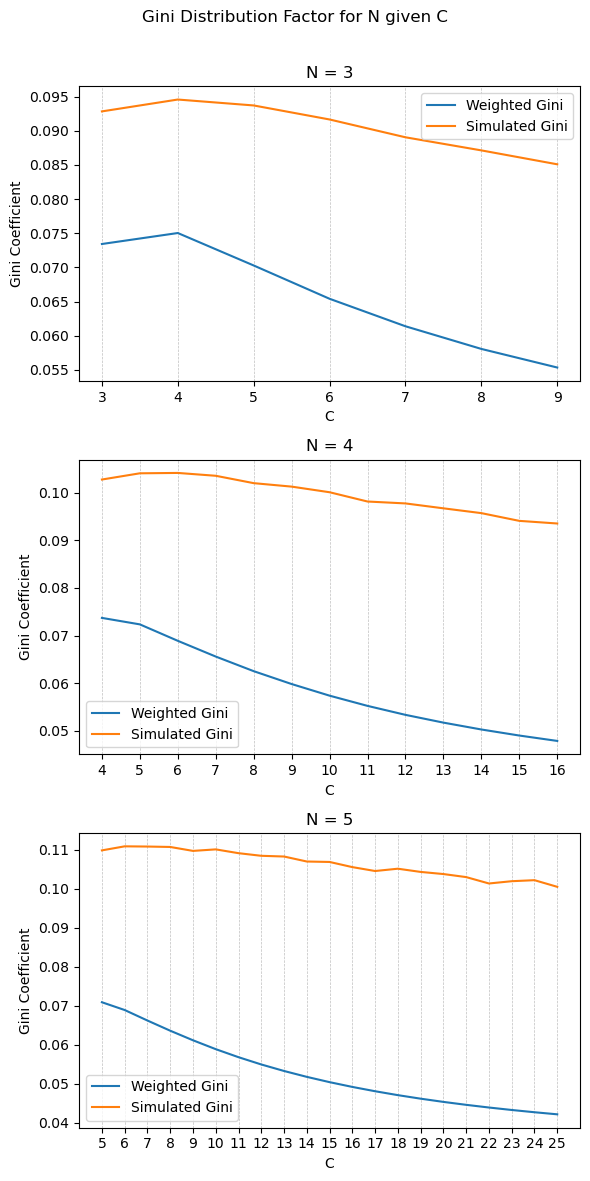

In [55]:
# Figure III.2.h.iii: Comparison of the weighted and simulated Gini of various C for N in [3,4,5].
gini_subset_3 = gini[gini.N == 3].set_index('C')[['Weighted Gini', 'Simulated Gini']]
gini_subset_4 = gini[gini.N == 4].set_index('C')[['Weighted Gini', 'Simulated Gini']]
gini_subset_5 = gini[gini.N == 5].set_index('C')[['Weighted Gini', 'Simulated Gini']]

fig, axes = plt.subplots(3, 1, figsize=(6, 12))

# Subplot 1: N = 3
axes[0].plot(gini_subset_3)
axes[0].set_xticks(np.arange(min(gini_subset_3.index), max(gini_subset_3.index)+1, 1.0))
axes[0].set_xlabel('C')
axes[0].set_ylabel('Gini Coefficient')
axes[0].set_title("N = 3")
axes[0].grid(axis='x', color='gray', linestyle='dashed', linewidth=0.5, alpha=0.5)
axes[0].legend(gini_subset_3.columns)

# Subplot 2: N = 4
axes[1].plot(gini_subset_4)
axes[1].set_xticks(np.arange(min(gini_subset_4.index), max(gini_subset_4.index)+1, 1.0))
axes[1].set_xlabel('C')
axes[1].set_ylabel('Gini Coefficient')
axes[1].set_title("N = 4")
axes[1].grid(axis='x', color='gray', linestyle='dashed', linewidth=0.5, alpha=0.5)
axes[1].legend(gini_subset_4.columns)

# Subplot 3: N = 5
axes[2].plot(gini_subset_5)
axes[2].set_xticks(np.arange(min(gini_subset_5.index), max(gini_subset_5.index)+1, 1.0))
axes[2].set_xlabel('C')
axes[2].set_ylabel('Gini Coefficient')
axes[2].set_title("N = 5")
axes[2].grid(axis='x', color='gray', linestyle='dashed', linewidth=0.5, alpha=0.5)
axes[2].legend(gini_subset_5.columns)

fig.suptitle('Gini Distribution Factor for N given C\n\n')
plt.tight_layout()
plt.show()

#### As both the weighted Gini coefficient and the simulated Gini coefficient decrease with increasing number of total credits, the distribution of voting power becomes more equal. 
This behavior is observed up to a certain level of C, beyond which the Gini coefficients approach an asymptotic value. This trend suggests that providing more credits facilitates a more equitable distribution of voting power, particularly benefiting voters with broader interests. These voters can spread their voting power across a greater number of issues, thereby offsetting the disproportionate influence that "concentrators" might hold in scenarios with lower C levels. Thus, the increase in total credits contributes to a more balanced and fair voting environment.

# III.4) Analytical vs Computational

The computational approaches failed to deliver unambiguous conclusions or show evident correlations with the analytical findings.  There are a few trends, such as the distribution of voting power becoming (slightly) more equitable as the total number of credits increases, up to a point.  This trend is captured by the Gini coefficient. Nevertheless, its impact is sufficiently minor that we didn't directly incorporate it into our final results.

Considering our other findings, the analytical function for determining total credits, $C = f(N) = {(N+3)}//{4}* N$, emerges as a suitable choice for a polar ballot. To delve deeper into its effects, we plan to utilize this function in a simulated vote. Additionally, to augment our understanding, we'll examine the results under the lens of priority voting.

Our next step involves constructing a dictionary of total credits (C) as a function of the number of items (N) for each voting type.

In [56]:
C_dict_polar = {}
C_dict_priority = {}
for N in range(3,101):
    C_polar = (N+3)//4 * N
    C_priority = N//2 * N + 1
    C_dict_polar[N] = C_polar
    C_dict_priority[N] = C_priority

Now examining for Multiple N, via Voting Power histograms:

N = 3, C = 3
Max VP = 3.0 | Avg VP =  2.205 | Min VP = 1.732


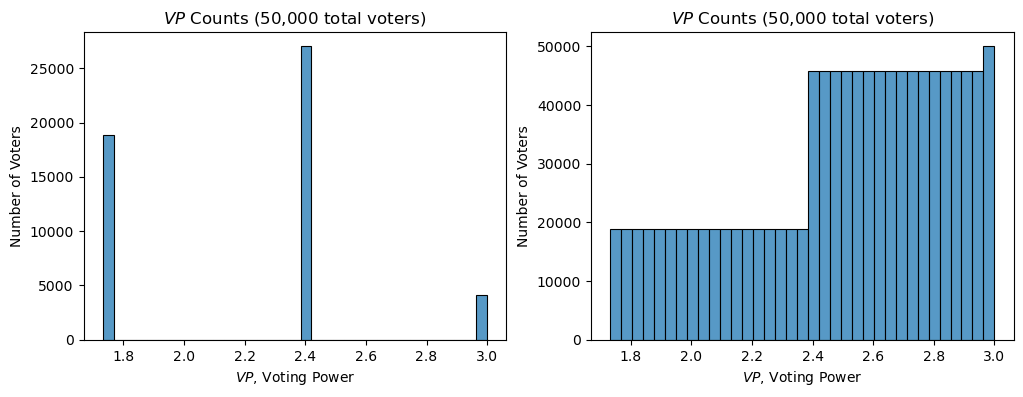





N = 4, C = 4
Max VP = 4.0 | Avg VP =  2.736 | Min VP = 2.0


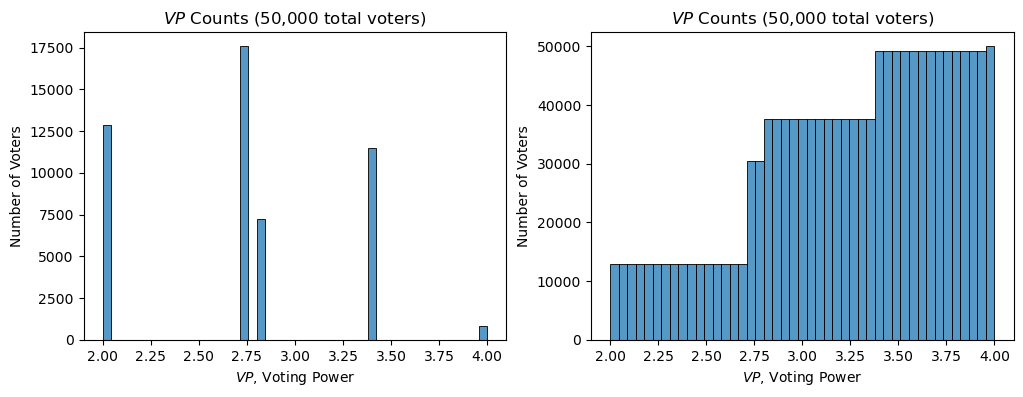





N = 5, C = 10
Max VP = 7.071 | Avg VP =  4.947 | Min VP = 3.162


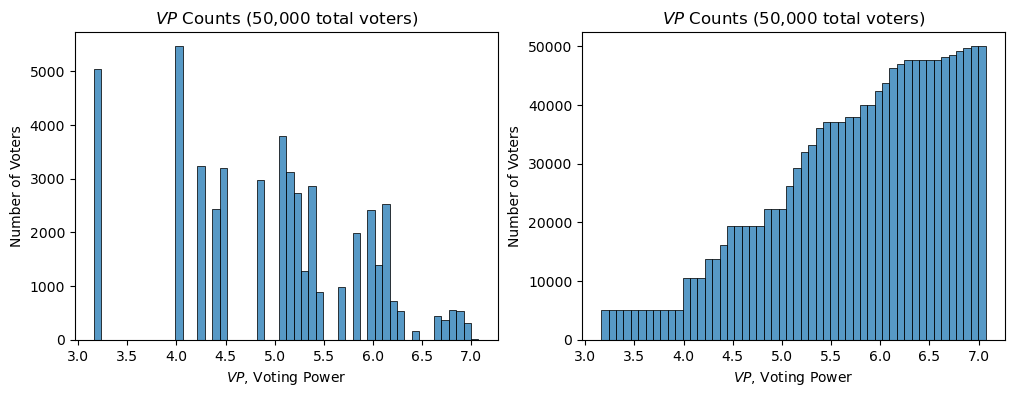





N = 6, C = 12
Max VP = 8.485 | Avg VP =  5.562 | Min VP = 3.464


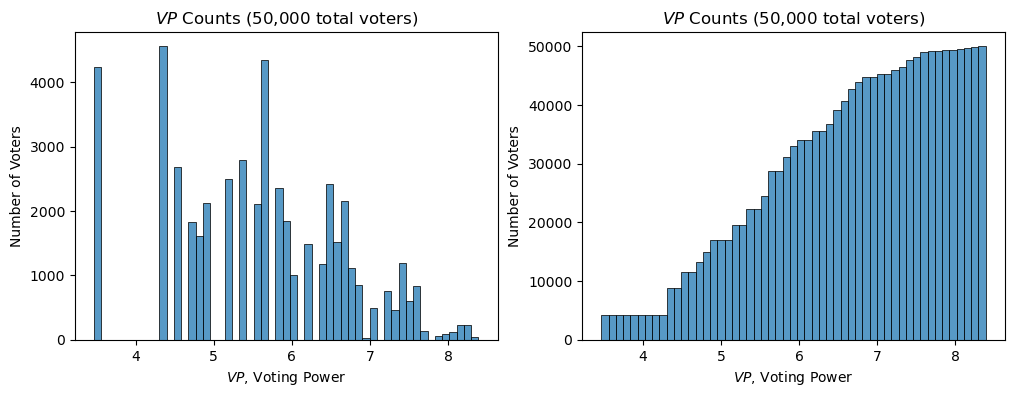





N = 7, C = 14
Max VP = 9.899 | Avg VP =  6.142 | Min VP = 3.742


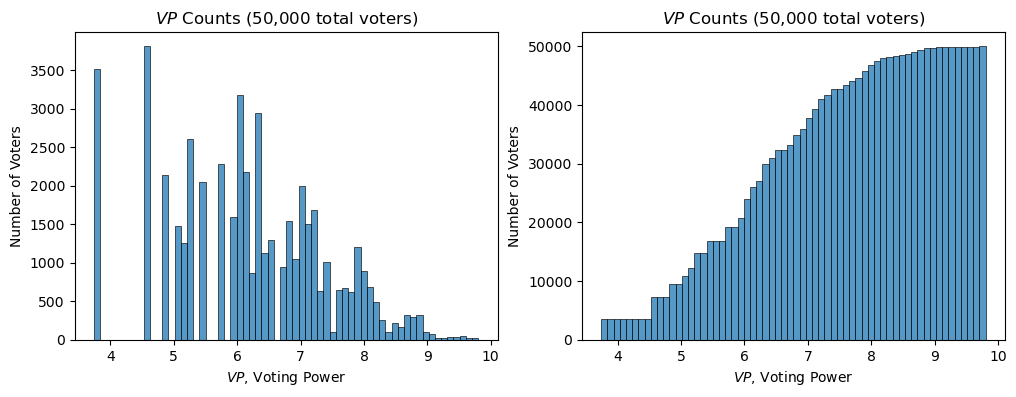





N = 8, C = 16
Max VP = 11.314 | Avg VP =  6.657 | Min VP = 4.0


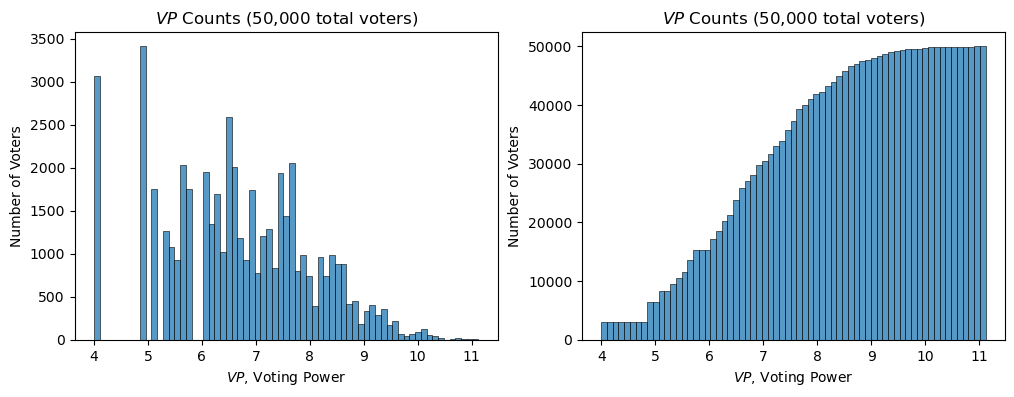





N = 9, C = 27
Max VP = 15.588 | Avg VP =  9.028 | Min VP = 5.196


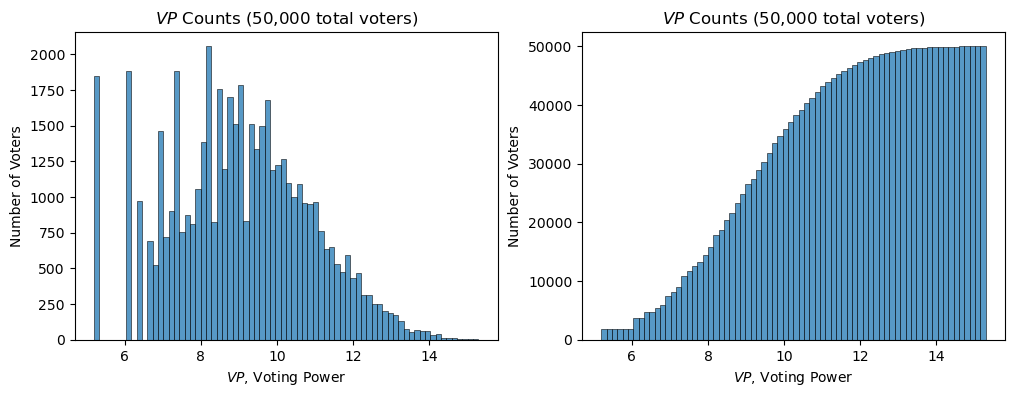





N = 10, C = 30
Max VP = 17.321 | Avg VP =  9.574 | Min VP = 5.477


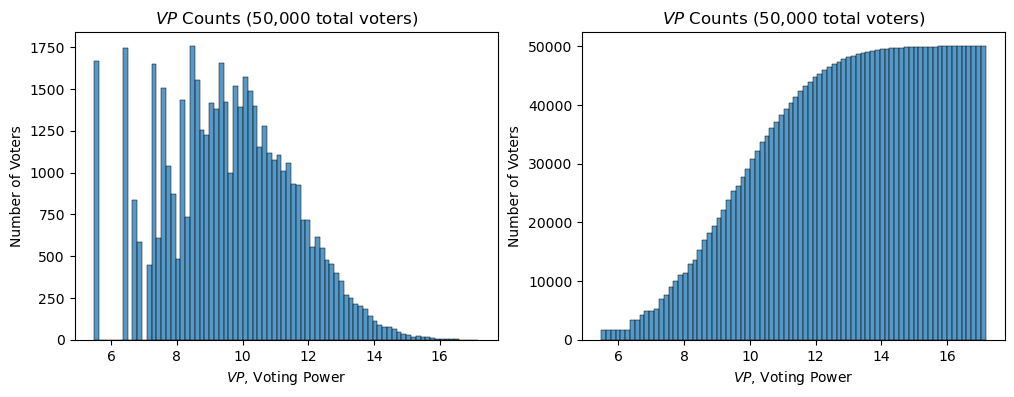





N = 11, C = 33
Max VP = 19.053 | Avg VP =  10.122 | Min VP = 5.745


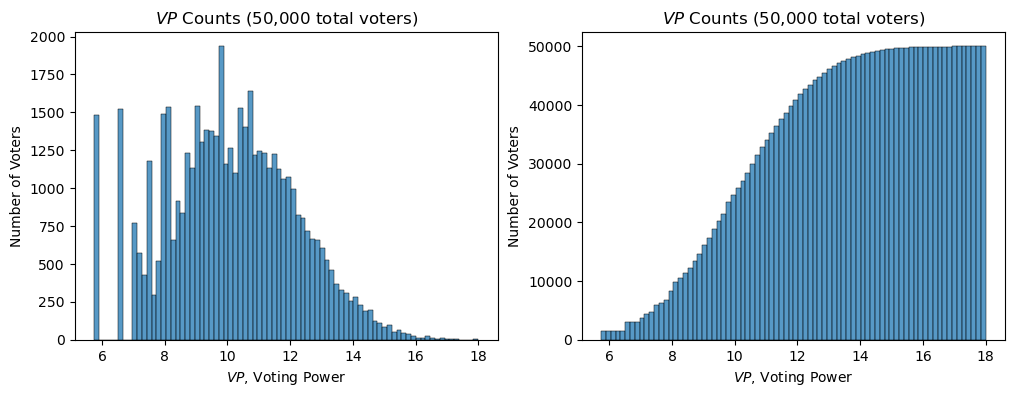





N = 12, C = 36
Max VP = 20.785 | Avg VP =  10.612 | Min VP = 6.0


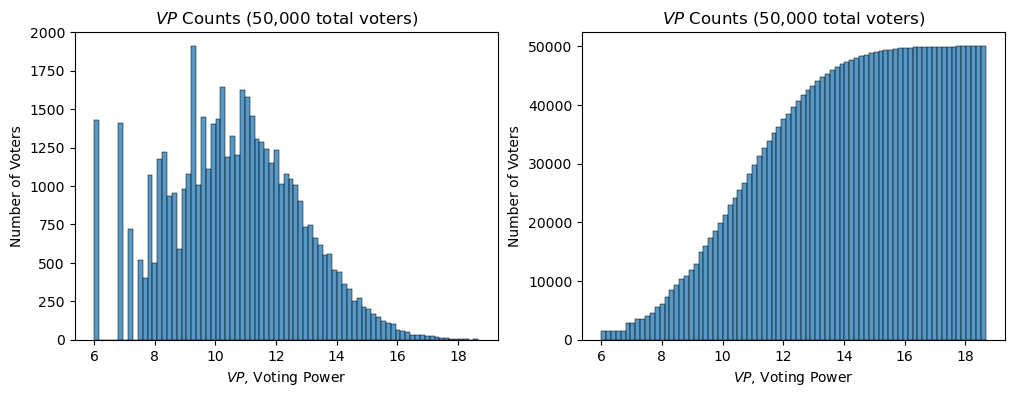





N = 13, C = 52
Max VP = 26.0 | Avg VP =  13.041 | Min VP = 7.211


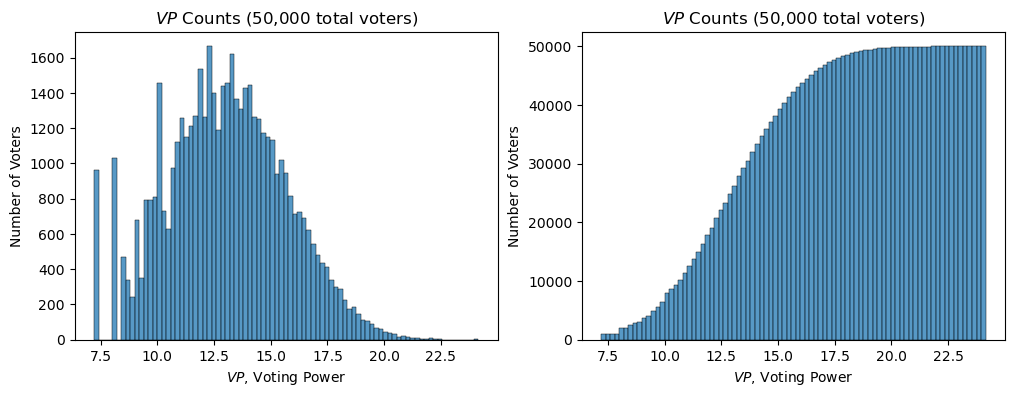





N = 14, C = 56
Max VP = 28.0 | Avg VP =  13.565 | Min VP = 7.483


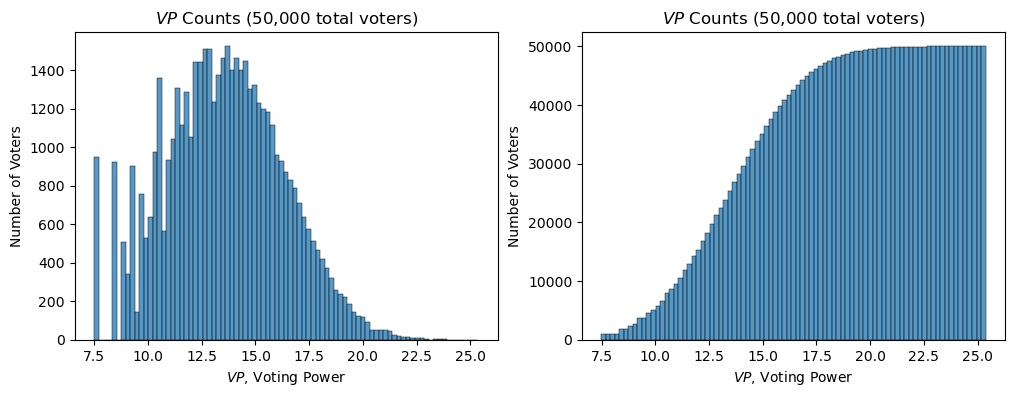





N = 15, C = 60
Max VP = 30.0 | Avg VP =  14.083 | Min VP = 7.746


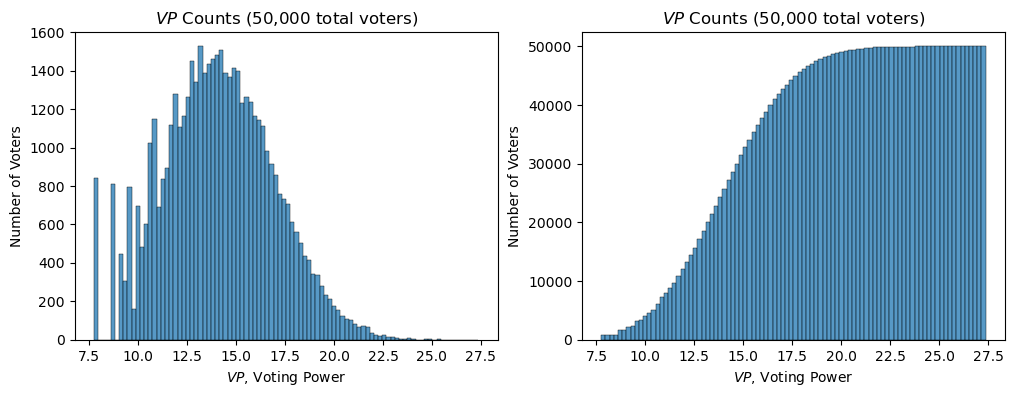





N = 16, C = 64
Max VP = 32.0 | Avg VP =  14.617 | Min VP = 8.0


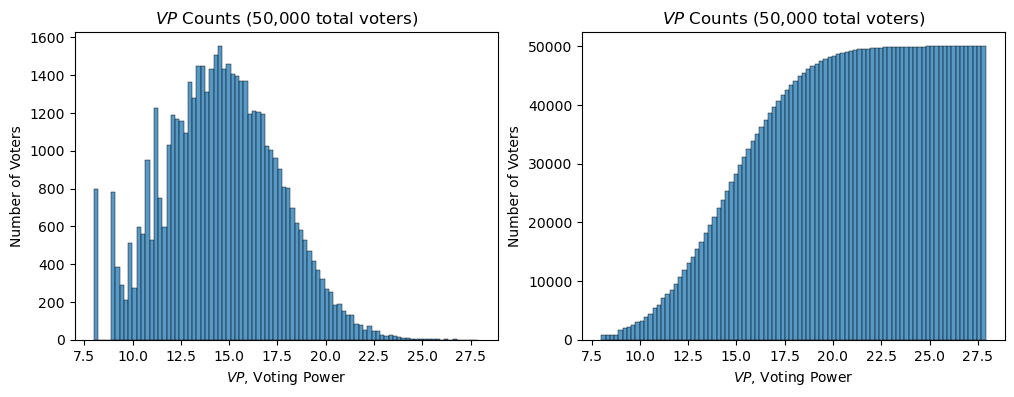





N = 17, C = 85
Max VP = 38.013 | Avg VP =  17.048 | Min VP = 9.22


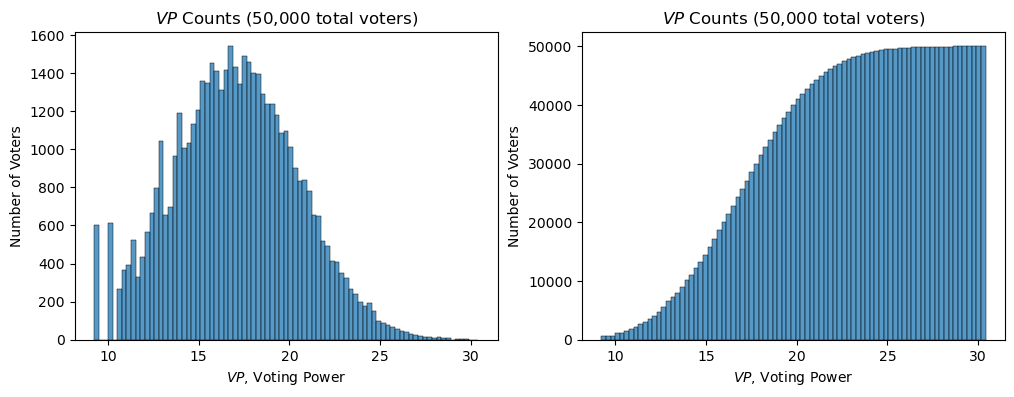





N = 18, C = 90
Max VP = 40.249 | Avg VP =  17.573 | Min VP = 9.487


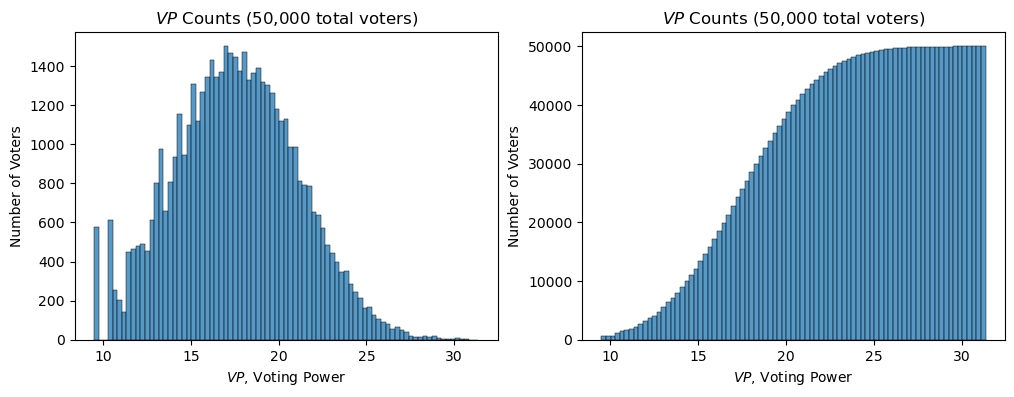





N = 19, C = 95
Max VP = 42.485 | Avg VP =  18.087 | Min VP = 9.747


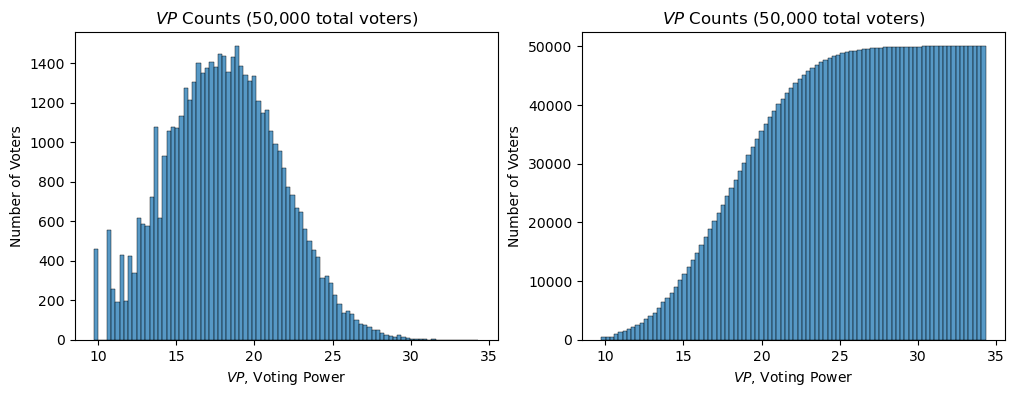





N = 20, C = 100
Max VP = 44.721 | Avg VP =  18.574 | Min VP = 10.0


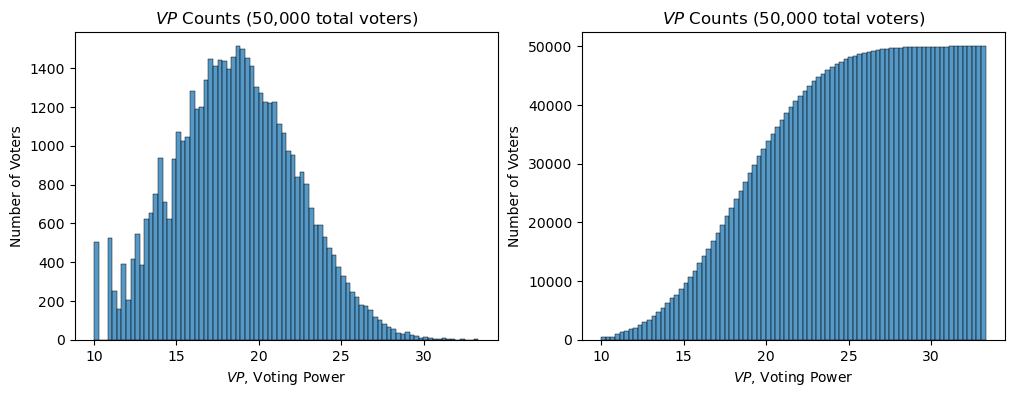





N = 21, C = 126
Max VP = 51.439 | Avg VP =  21.021 | Min VP = 11.225


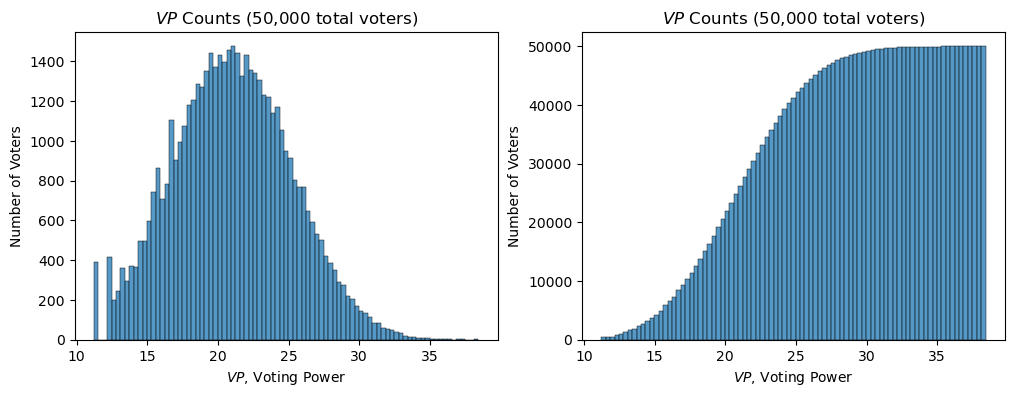





N = 22, C = 132
Max VP = 53.889 | Avg VP =  21.547 | Min VP = 11.489


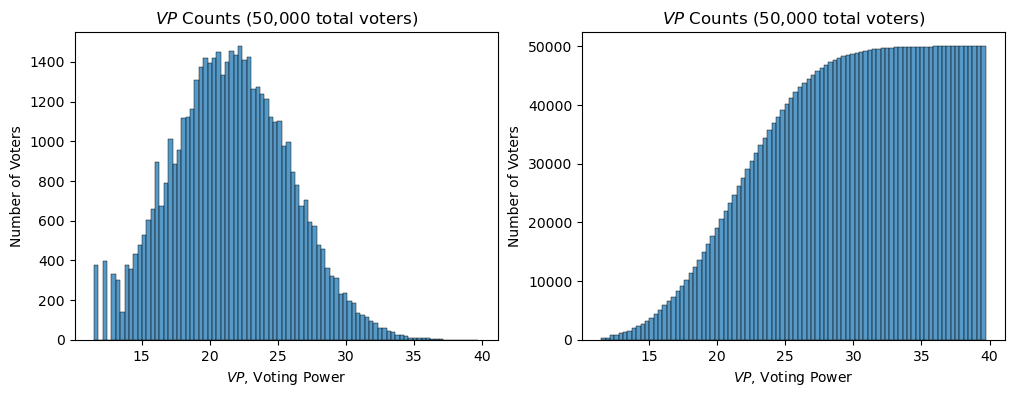





N = 23, C = 138
Max VP = 56.338 | Avg VP =  22.088 | Min VP = 11.747


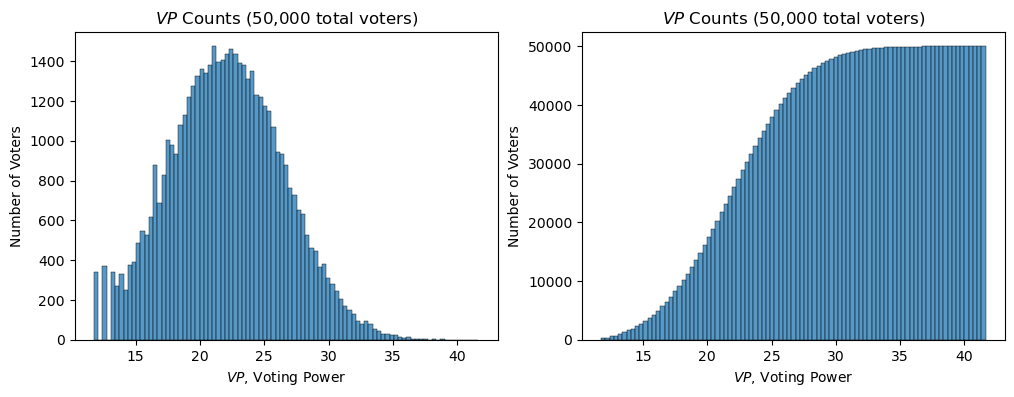





N = 24, C = 144
Max VP = 58.788 | Avg VP =  22.551 | Min VP = 12.0


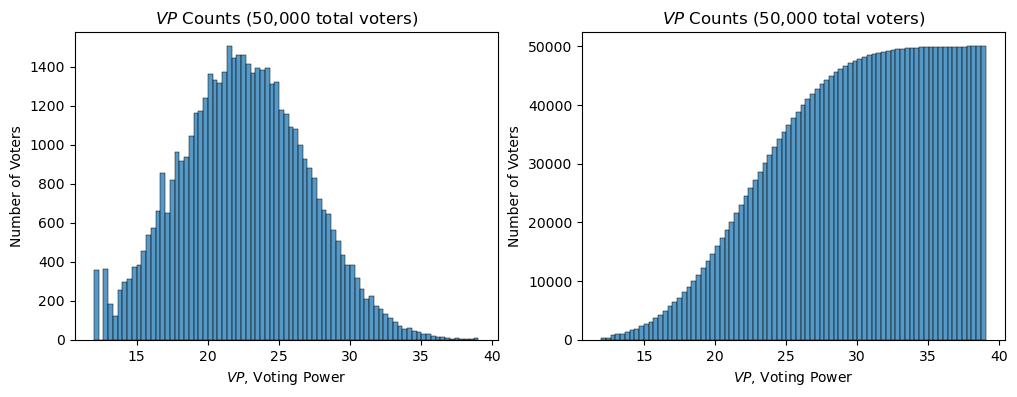





N = 25, C = 175
Max VP = 66.144 | Avg VP =  25.097 | Min VP = 13.229


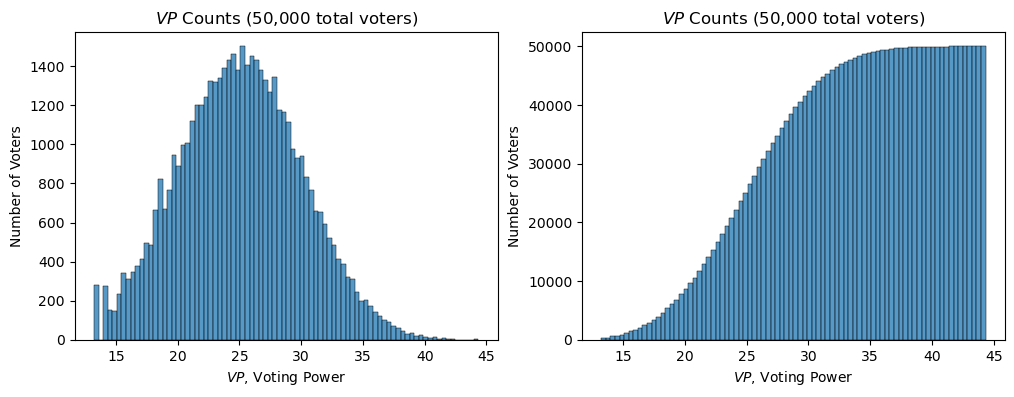

In [57]:
# Example III.4(1): Histogram and Cumulative Histogram of Simulated Voting Outcomes from N = 3 to N = 25.
for N in range(3,26):
    C = C_dict_polar[N]
    voters = 50000

    VP_list = []
    for _ in range(voters):
        p = simulated_vote(N,C)
        p = sum([abs(x)**.5 for x in p]) 
        VP_list.append(p)

    VP_list.sort()

    print(f'N = {N}, C = {C}')
    print('Max VP =',round(N*(C/N)**.5,3),'|','Avg VP = ',round(sum(VP_list)/voters,3),'|','Min VP =',round(C**.5,3))
    plt.figure(figsize = (12,4))
    plt.subplot(121)
    plt.ylabel('Number of Voters')
    plt.xlabel('$VP$, Voting Power')
    plt.title('$VP$ Counts (50,000 total voters)')
    sns.histplot(VP_list)
    plt.subplot(122)
    plt.ylabel('Number of Voters')
    plt.xlabel('$VP$, Voting Power')
    plt.title('$VP$ Counts (50,000 total voters)')
    sns.histplot(VP_list, cumulative = True)
    plt.show()
    print('\n\n\n')

Now examining Priority:

N = 3, C = 4
Max VP = 3.464 Average VP =  132796.3726503644


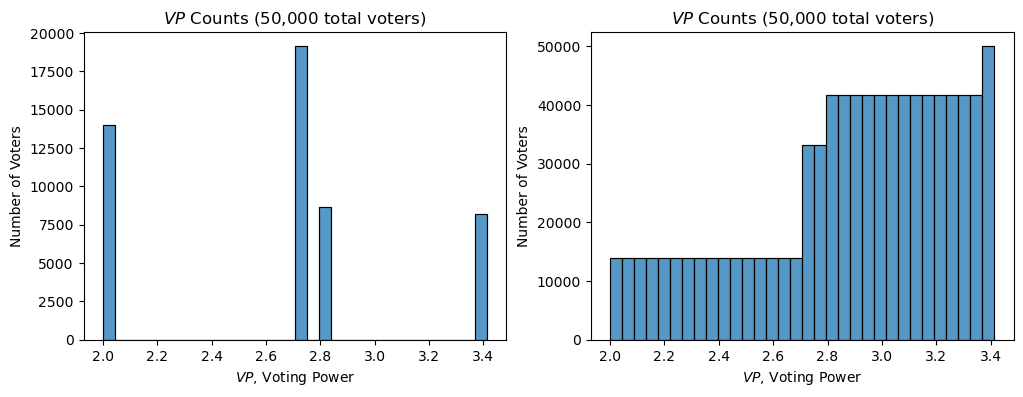





N = 4, C = 9
Max VP = 6.0 Average VP =  227038.94110548566


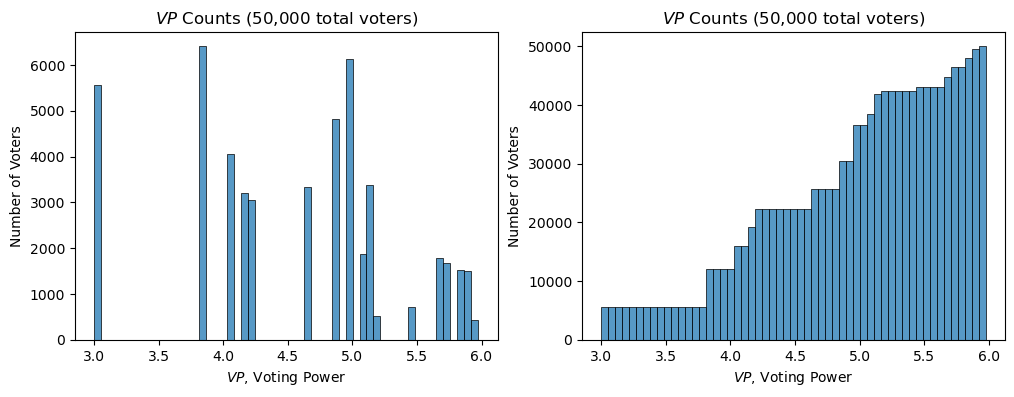





N = 5, C = 11
Max VP = 7.416 Average VP =  262298.78113829374


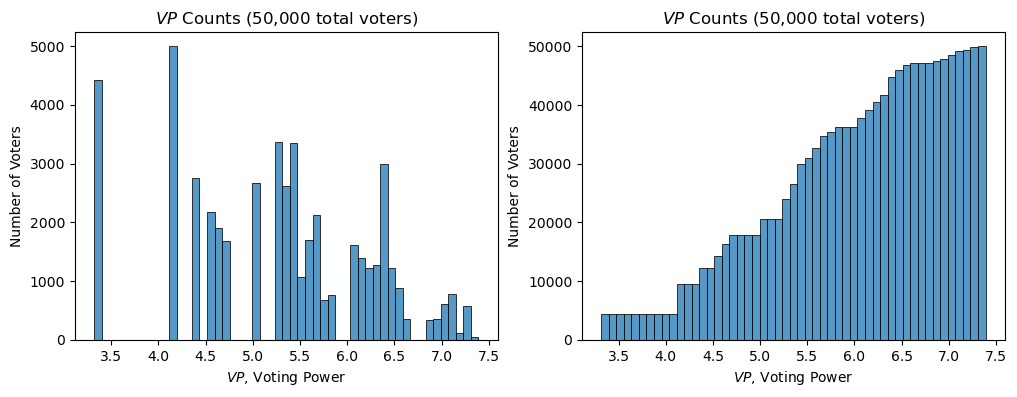





N = 6, C = 19
Max VP = 10.677 Average VP =  364083.7876410702


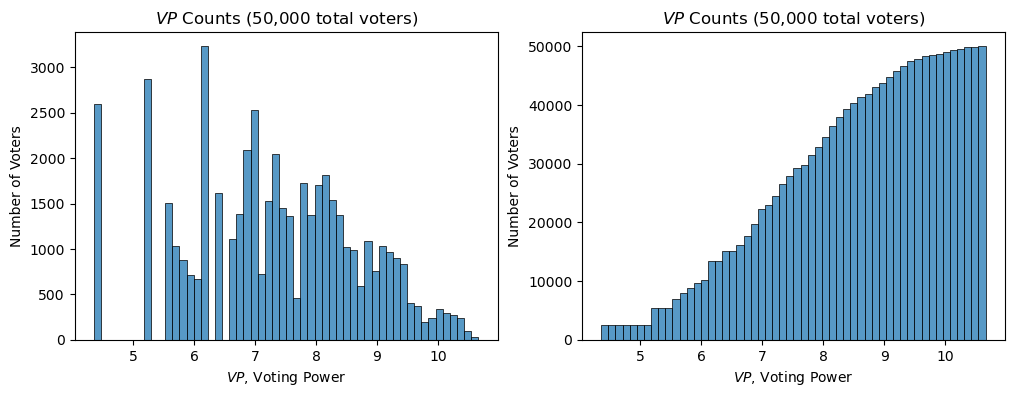





N = 7, C = 22
Max VP = 12.41 Average VP =  399271.83256978437


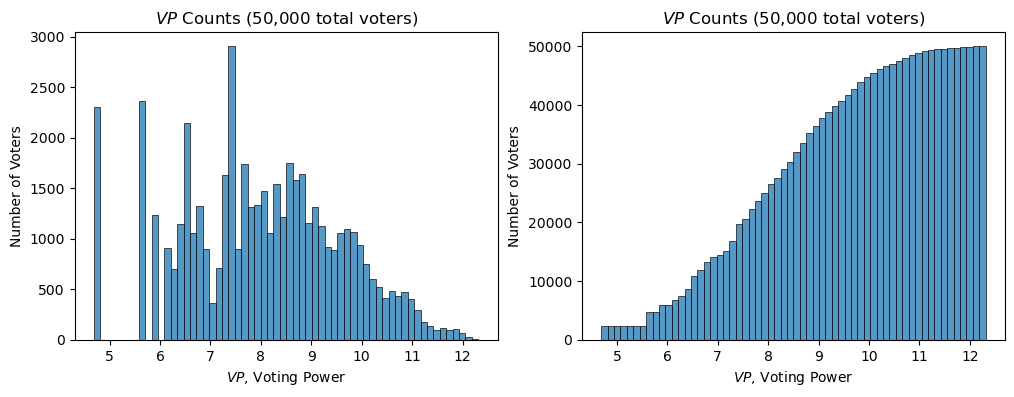





N = 8, C = 33
Max VP = 16.248 Average VP =  503917.1891657589


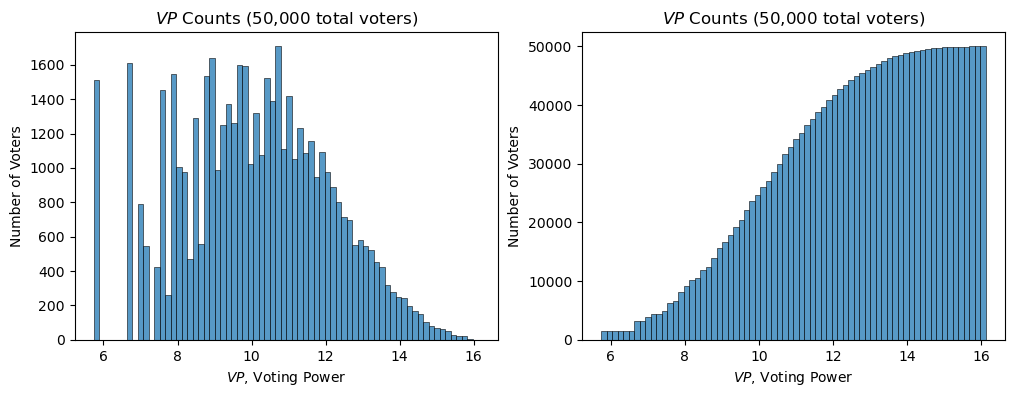





N = 9, C = 37
Max VP = 18.248 Average VP =  538867.0850923642


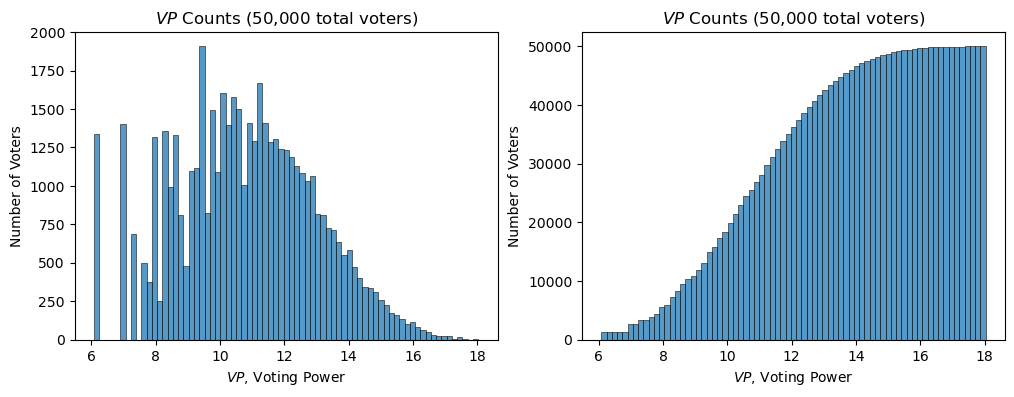





N = 10, C = 51
Max VP = 22.583 Average VP =  644357.7725768173


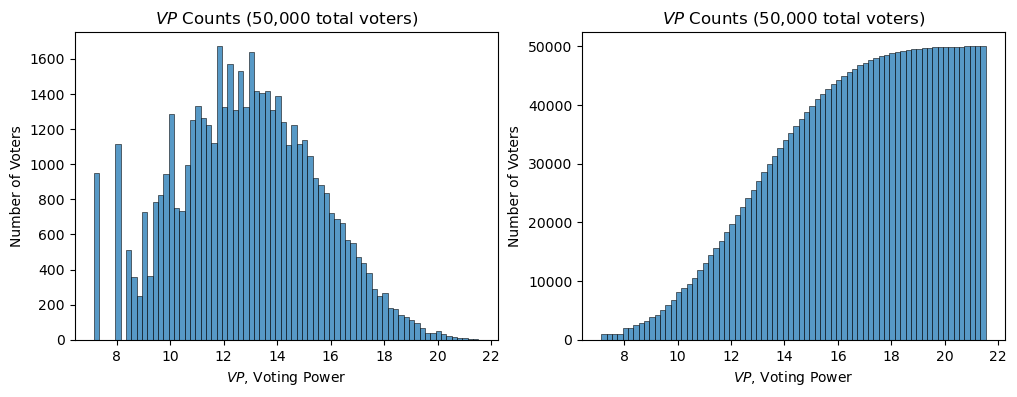





N = 11, C = 56
Max VP = 24.819 Average VP =  678229.142740493


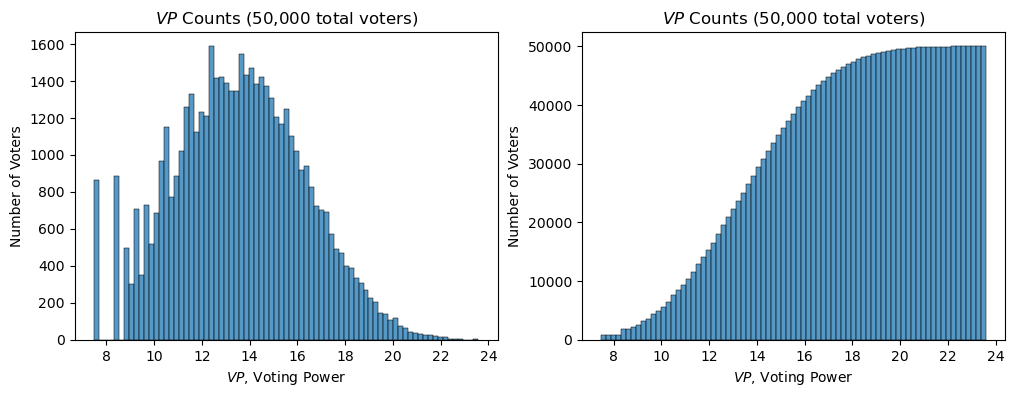





N = 12, C = 73
Max VP = 29.597 Average VP =  784609.8716786709


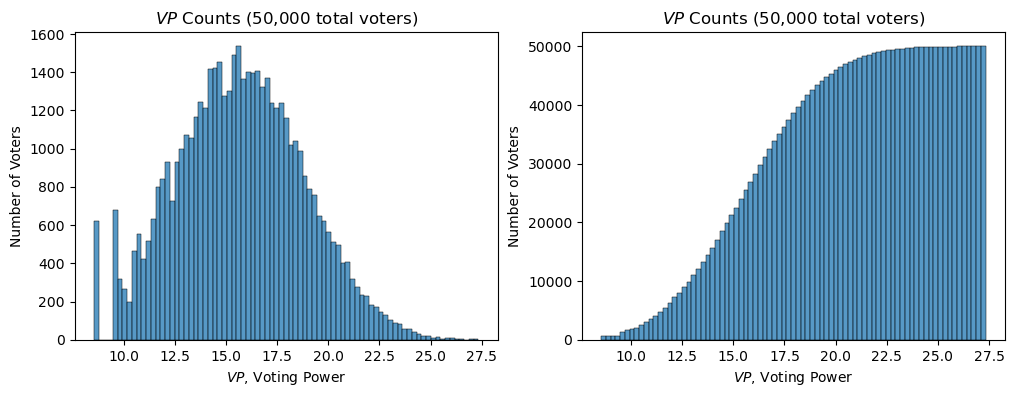





N = 13, C = 79
Max VP = 32.047 Average VP =  819035.3734462202


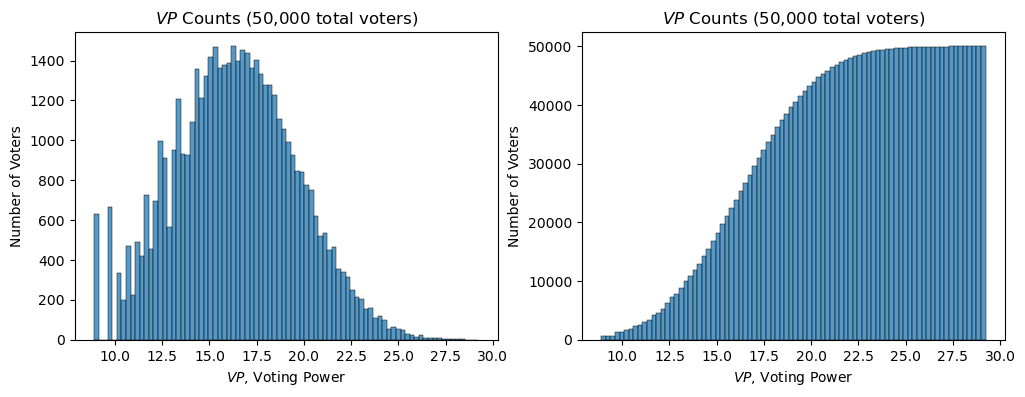





N = 14, C = 99
Max VP = 37.229 Average VP =  924268.3233852991


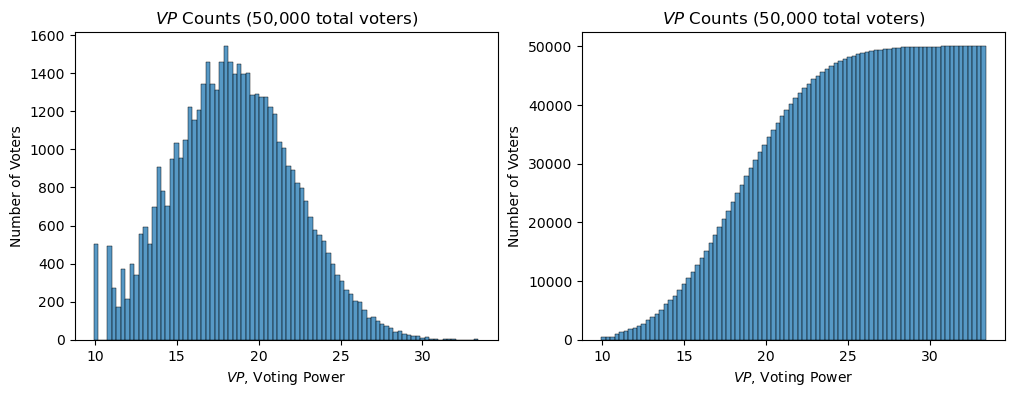





N = 15, C = 106
Max VP = 39.875 Average VP =  958308.5766378465


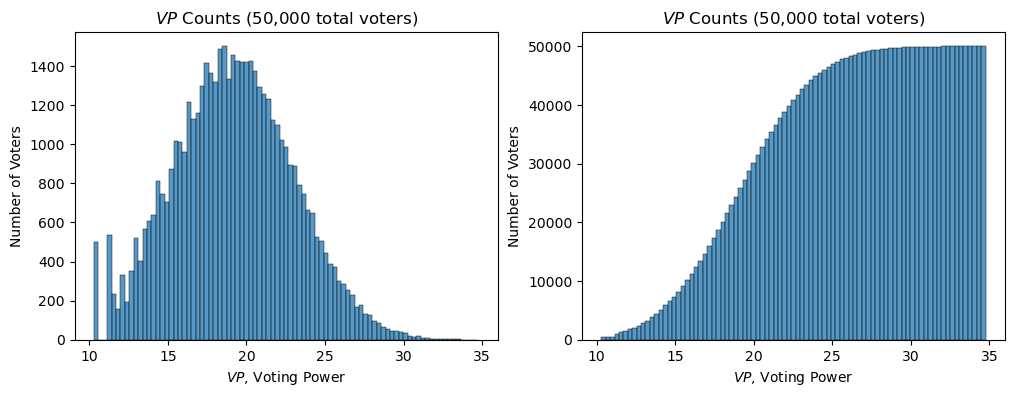





N = 16, C = 129
Max VP = 45.431 Average VP =  1064075.0232931802


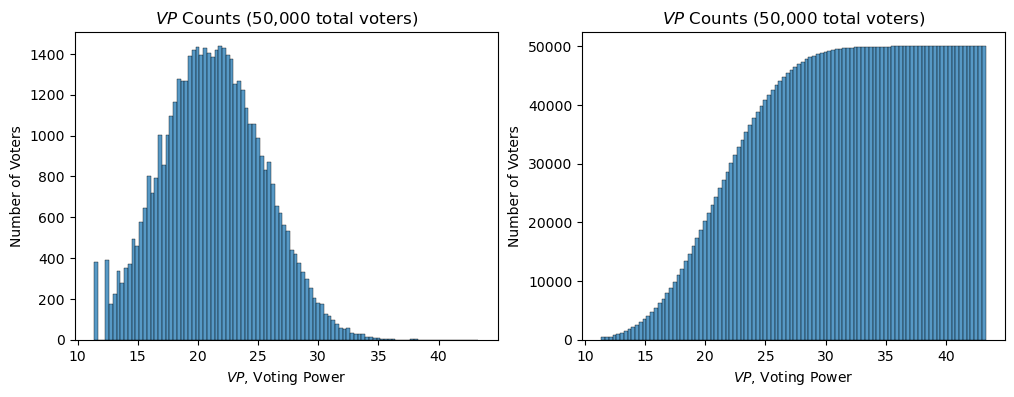





N = 17, C = 137
Max VP = 48.26 Average VP =  1099532.8441241742


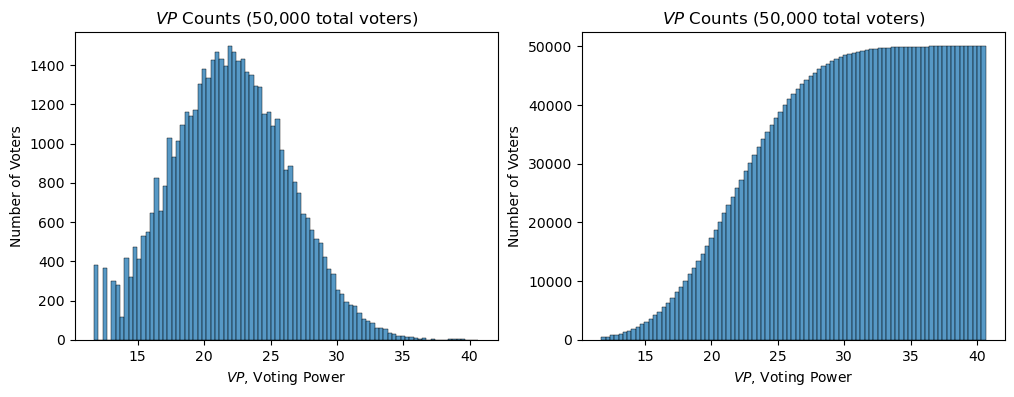





N = 18, C = 163
Max VP = 54.166 Average VP =  1204041.8668939178


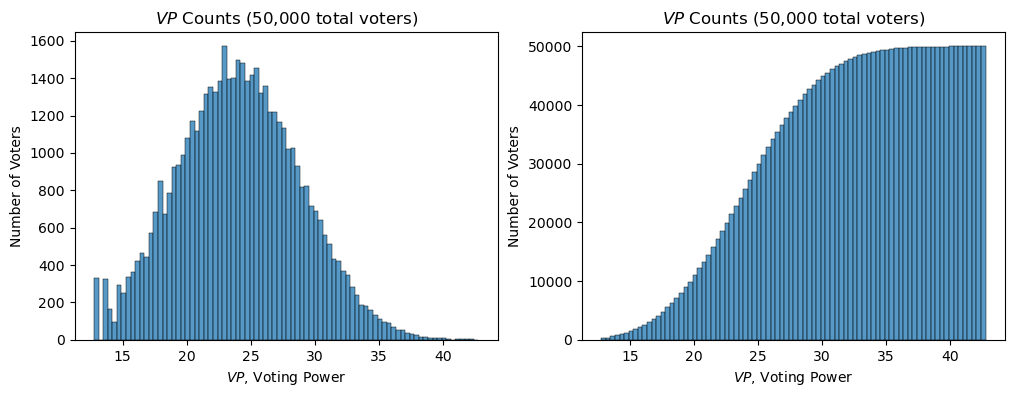





N = 19, C = 172
Max VP = 57.166 Average VP =  1242624.4472930792


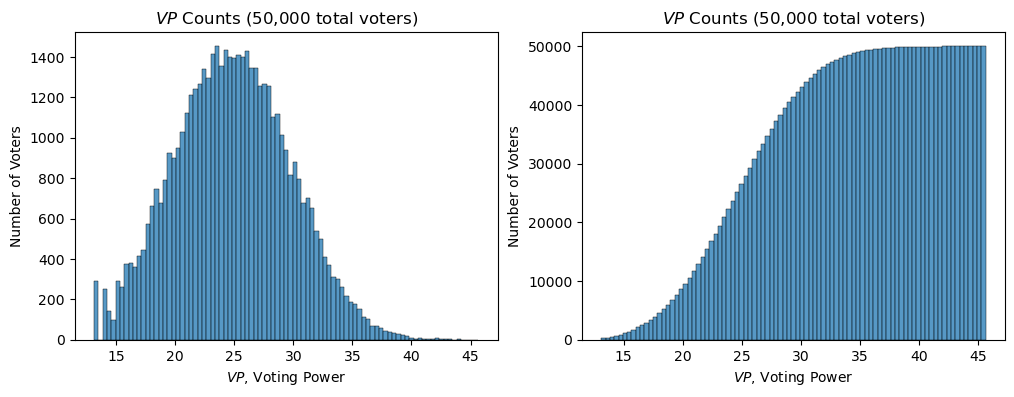





N = 20, C = 201
Max VP = 63.403 Average VP =  1345807.0068953296


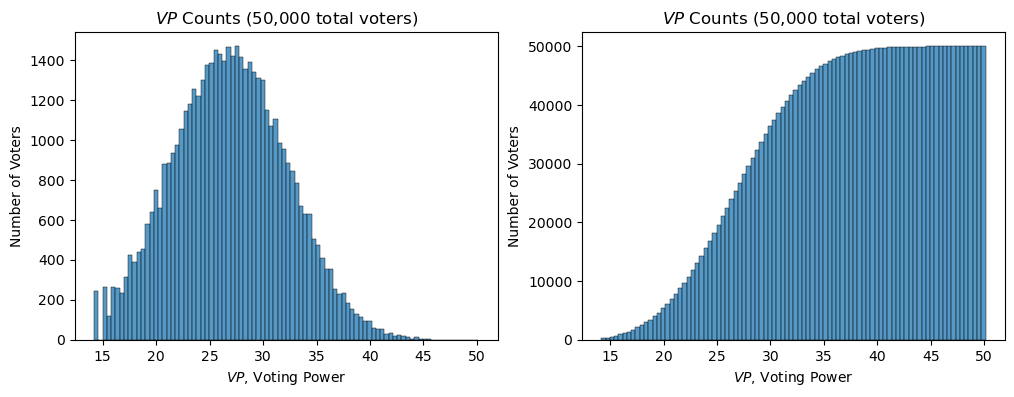





N = 21, C = 211
Max VP = 66.566 Average VP =  1383245.4040721576


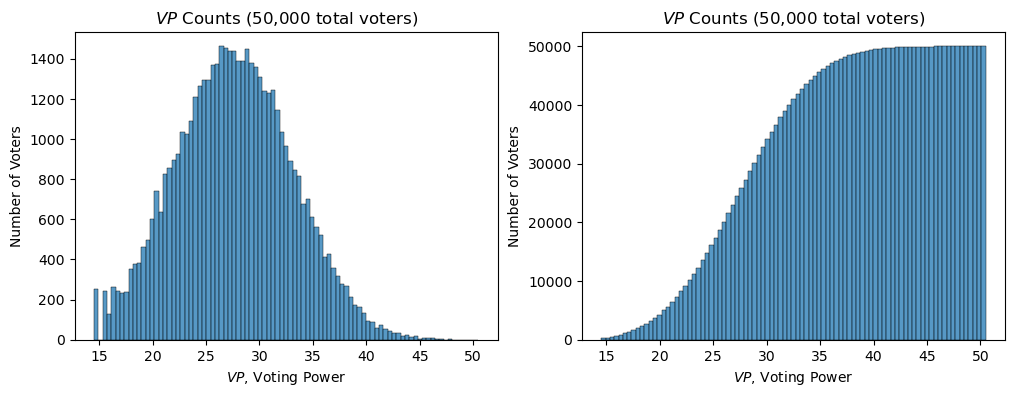





N = 22, C = 243
Max VP = 73.116 Average VP =  1488761.847105751


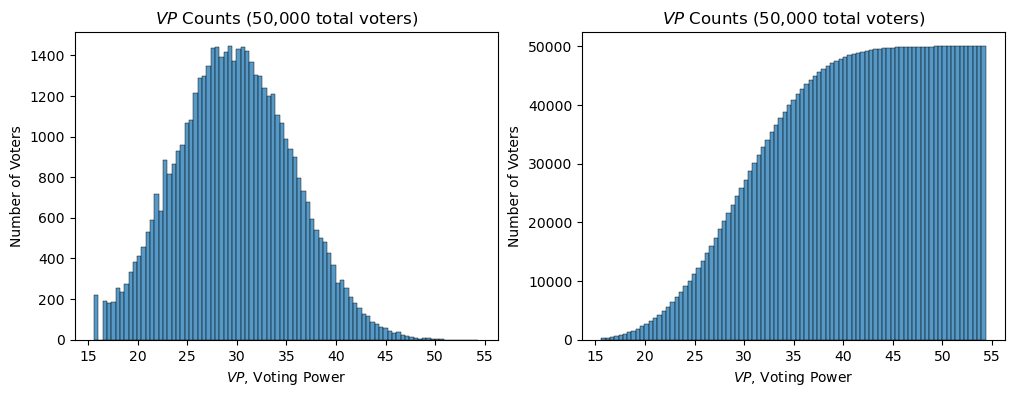





N = 23, C = 254
Max VP = 76.433 Average VP =  1521531.374952365


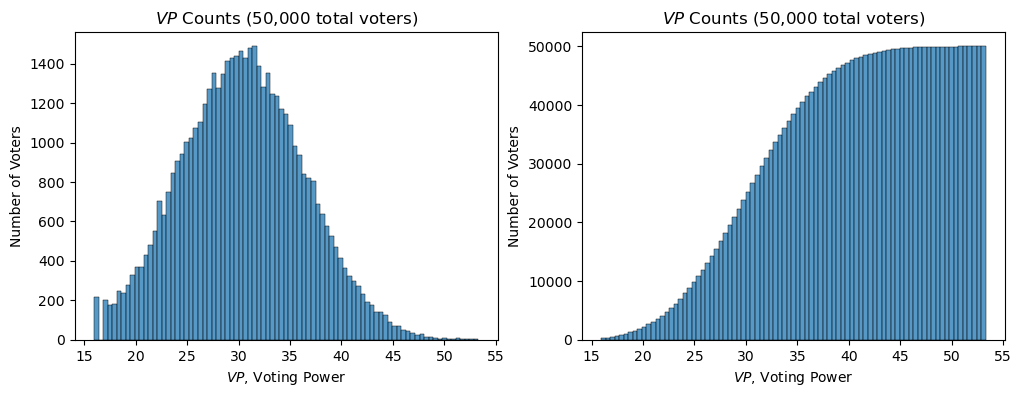





N = 24, C = 289
Max VP = 83.283 Average VP =  1629819.695975806


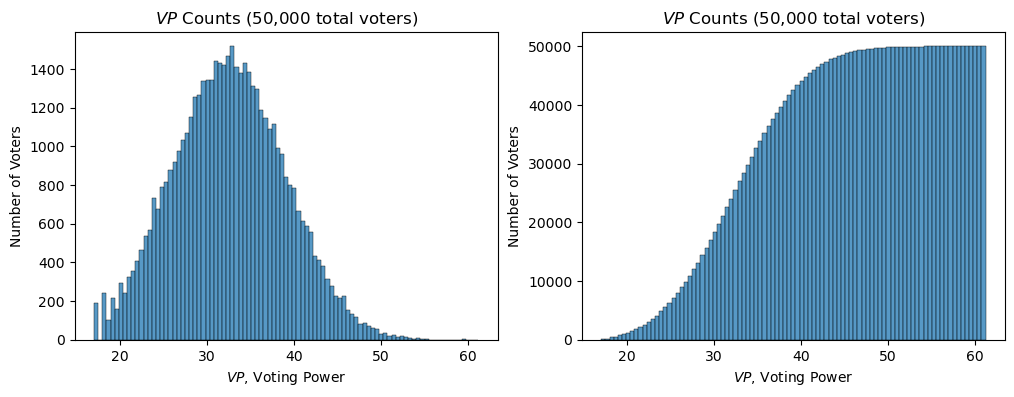





N = 25, C = 301
Max VP = 86.747 Average VP =  1662612.040418493


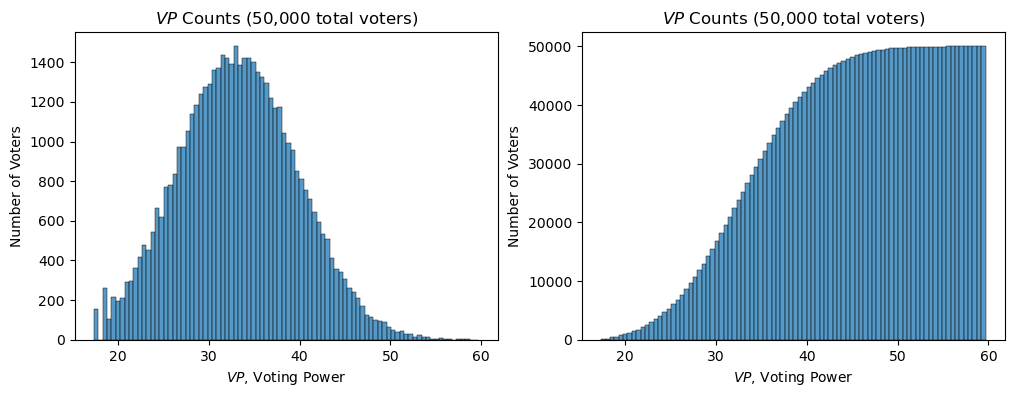

In [58]:
# Example III.4(1): Histogram of Simulated Voting Outcomes from N = 3 to N = 25.
for N in range(3,26):
    C = C_dict_priority[N]
    voters = 50000

    VP_list = []
    for _ in range(voters):
        p = simulated_vote(N,C)
        p = sum([abs(x)**.5 for x in p]) 
        VP_list.append(p)

    VP_list.sort()

    print(f'N = {N}, C = {C}')
    print('Max VP =',round(N*(C/N)**.5,3), 'Average VP = ',sum(VP_list))
    plt.figure(figsize = (12,4))
    plt.subplot(121)
    plt.ylabel('Number of Voters')
    plt.xlabel('$VP$, Voting Power')
    plt.title('$VP$ Counts (50,000 total voters)')
    sns.histplot(VP_list)
    plt.subplot(122)
    plt.ylabel('Number of Voters')
    plt.xlabel('$VP$, Voting Power')
    plt.title('$VP$ Counts (50,000 total voters)')
    sns.histplot(VP_list, cumulative = True)
    plt.show()
    print('\n\n\n')

---

# IV. RESULTS AND DISCUSSION

# IV.1) Key Takeaways

1. Continuous voting, using a discrete number of voting credits, is a versatile approach applicable to a wide variety of decision-making scenarios, despite the different impacts each voting format may have on the selection of total credits (C).

2. Voters can be broadly categorized into two groups: those who concentrate their voting power and those who spread it.

3. As the total credits (C) increase, the total number of available strategies grows geometrically, especially for large numbers of voting items (N). Thus, even a small amount of credits should suffice to differentiate preferences, making the system acceptably granular enough to all voters.

4. Although we haven't yet found any clear patterns in numerical methods, nor correlations with analytical methods, this research provides a robust and functional foundation for further study.

# IV.2) Discussion

The implementation of a continuous voting system using a discrete number of voting credits emerges as a notably practical adaptation of quadratic voting. This method accommodates a broad array of decision-making scenarios by enabling a large number of potential voting strategies, thereby catering to the diverse preferences of voters. Such a system exhibits considerable versatility in addressing varying voter behaviors, whether the inclination is to concentrate or disperse voting power. 

In terms of computational simplicity, this approach yields additional benefits. The voting outcome can be captured as a sum of squared terms, which not only simplifies subsequent calculations but also facilitates algorithmic comparison of outcomes. Moreover, this format allows for comparison without the need for floating-point computations, providing a computational advantage where such precision may not be necessary or feasible.

While our method supports polar voting, it's worth noting that its application to multiple ballots is not feasible. This is an important consideration for those seeking to apply this approach in scenarios involving multiple concurrent voting events.

Our exploration of numerical methods and their potential correlations with analytical methods is still ongoing. Although we have yet to discover clear patterns, the groundwork laid in this study provides a robust foundation for future investigation. We remain committed to expanding this line of inquiry, with the hope of uncovering deeper insights into the nuances of continuous voting with discrete credits.

# IV.3) Next Steps/Future Investigations

1. Add formal proofs to the analytical section.
2. Continue to examine computational methods.
3. Examine the impact of number of voters on C, if any.
4. Build square term comparison algorithm (minimize or eliminate use of floats in comparing strategy).
5. Build a simple applet to demonstrate the program.  Potential MVP would be an app for groups of friends to decide on plans.

-----

# APPENDIX A: Table of various C =  f(N) 

#### A number of Credit Models (CM) were explored throughout the process of notebook.  The following is a table of them from N = 3 to N = 30.

,CM1,CM2,CM3,CM4,CM5,CM6,CM7,CM8,CM9
N,,,,,,,,,
3,4,2,3,3,4,4,6,9,100
4,5,4,4,6,9,9,12,16,100
5,6,6,10,10,11,16,20,25,100
6,7,9,12,15,19,25,30,36,100
7,8,12,14,21,22,36,42,49,100
8,9,16,16,28,33,49,56,64,100
9,10,20,27,36,37,64,72,81,100
10,11,25,30,45,51,81,90,100,100
11,12,30,33,55,56,100,110,121,100


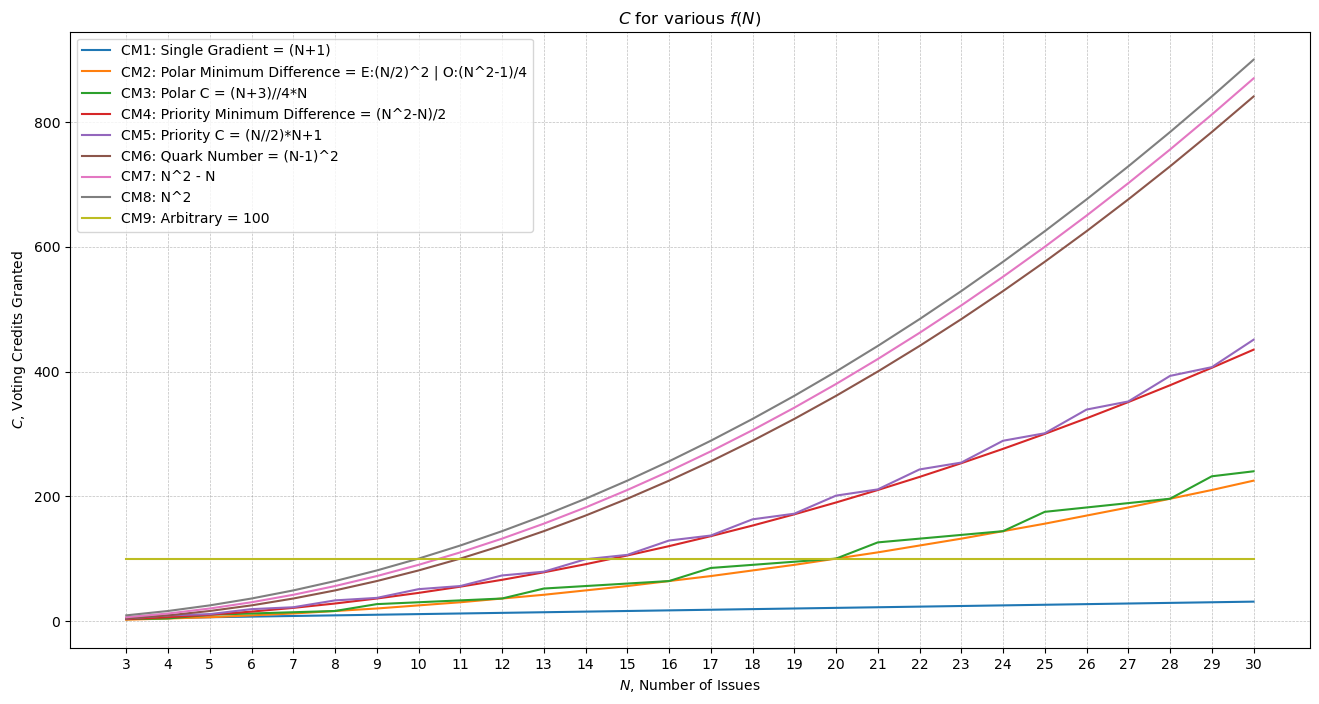

In [59]:
## Create a dataframe with index N
da = pd.DataFrame()
da['N'] = range(3,31)
da = da.set_index('N')

## Create the Credit Models and plug into the dataframe
        
# CM1
# Single Gradient = (N+1)
da['CM1'] = da.index + 1
# CM2 
# Polar Minimum Difference = E:(N/2)^2 | O:(N^2-1)/4
polar_min = []
for i in da.index:
    if i%2 == 1:
        polar_min.append((i**2 - 1) / 4)
    else:
        polar_min.append((i/2)**2)
da['CM2'] = polar_min
# CM3 
# Polar C = (N+3)//4*N
da['CM3'] = (da.index + 3) // 4 * da.index
# CM4 
# Priority Minimum Difference = (N^2-N)/2
da['CM4'] = ((da.index**2 - da.index)/2) 
# CM5 
# Priority C = (N//2)*N+1
da['CM5'] = (da.index // 2) * da.index + 1
# CM6
# Quark Number = (N-1)^2
da['CM6'] = (da.index-1)**2
# CM7 
# N^2 - N
da['CM7'] = da.index**2 - da.index
# CM8
# N^2
da['CM8'] = da.index**2
# CM9
# Arbitrary = 100
da['CM9'] = 100

## Display Dataframe

da = da.astype(int)
display(da)

## Graph

# Initialize Figure
plt.figure(figsize = (16,8))
plt.plot(da)
# Add axis labels
plt.ylabel('$C$, Voting Credits Granted')
plt.xlabel('$N$, Number of Issues')
# Add figure title and legend
plt.title('$C$ for various $f(N)$')
legend_labels = [
'CM1: Single Gradient = (N+1)',
'CM2: Polar Minimum Difference = E:(N/2)^2 | O:(N^2-1)/4',
'CM3: Polar C = (N+3)//4*N',
'CM4: Priority Minimum Difference = (N^2-N)/2',
'CM5: Priority C = (N//2)*N+1',
'CM6: Quark Number = (N-1)^2',
'CM7: N^2 - N',
'CM8: N^2',
'CM9: Arbitrary = 100'
]
plt.legend(legend_labels)

# Show all ticks at integers and full grid
plt.xticks(np.arange(min(da.index), max(da.index)+1, 1.0))
plt.grid(color='gray', linestyle='dashed', linewidth=0.5, alpha=0.5)
plt.show()